# Data Understanding

## IMPORT LIBRARIES & LOAD DATA

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("="*70)
print("BUSINESS UNDERSTANDING - TELCO CUSTOMER CHURN")
print("="*70)

print(f"\n✓ Dataset berhasil dimuat!")
print(f"✓ Jumlah data: {df.shape[0]:,} baris, {df.shape[1]} kolom")

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
BUSINESS UNDERSTANDING - TELCO CUSTOMER CHURN

✓ Dataset berhasil dimuat!
✓ Jumlah data: 7,043 baris, 21 kolom


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## DATA OVERVIEW & QUALITY CHECK

In [ ]:
print("\n" + "="*70)
print("2. DATA OVERVIEW")
print("="*70)

# Info dataset
print("\n📋 Struktur Data:")
df.info()

# Cek missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ Tidak ada missing values")
else:
    print(missing[missing > 0])

# Cek data duplikat
print(f"\n🔍 Data Duplikat: {df.duplicated().sum()}")

# Sample data
print("\n📊 Sample Data (5 baris pertama):")
print(df.head())

# Statistik deskriptif
print("\n📈 Statistik Deskriptif (Numerik):")
print(df.describe())


2. DATA OVERVIEW

📋 Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperl

## STRUKTUR DATA

In [ ]:
print("\n[STEP 2] STRUKTUR DATA")
print("-" * 80)

# Dimensi dataset
print(f"\n📊 DIMENSI DATASET:")
print(f"   • Jumlah Baris (Rows)    : {df.shape[0]:,}")
print(f"   • Jumlah Kolom (Columns) : {df.shape[1]}")
print(f"   • Total Data Points      : {df.shape[0] * df.shape[1]:,}")

# Info dataset
print(f"\n📋 INFORMASI TIPE DATA:")
print(df.info())

# Tipe data summary
print(f"\n📝 RINGKASAN TIPE DATA:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count} kolom")

# Sample data (head)
print(f"\n👀 PREVIEW DATA (5 Baris Pertama):")
print(df.head())

# Sample data (tail)
print(f"\n👀 PREVIEW DATA (5 Baris Terakhir):")
print(df.tail())

# Kolom-kolom dalam dataset
print(f"\n📑 DAFTAR KOLOM ({len(df.columns)} kolom):")
for idx, col in enumerate(df.columns, 1):
    print(f"   {idx:2d}. {col}")


[STEP 2] STRUKTUR DATA
--------------------------------------------------------------------------------

📊 DIMENSI DATASET:
   • Jumlah Baris (Rows)    : 7,043
   • Jumlah Kolom (Columns) : 22
   • Total Data Points      : 154,946

📋 INFORMASI TIPE DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  704

## DATA QUALITY CHECK

In [ ]:
print("\n" + "=" * 80)
print("[STEP 3] DATA QUALITY CHECK")
print("-" * 80)

# 4.1 Missing Values
print(f"\n🔍 CHECKING MISSING VALUES:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(f"   ⚠️  Ditemukan {len(missing_df)} kolom dengan missing values:")
    print(missing_df.to_string(index=False))
else:
    print(f"   ✓ Tidak ada missing values! Dataset bersih dari nilai kosong.")

# 4.2 Duplicate Check
print(f"\n🔍 CHECKING DUPLICATE DATA:")
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"   ⚠️  Ditemukan {duplicates} baris duplikat ({duplicates/len(df)*100:.2f}%)")
else:
    print(f"   ✓ Tidak ada data duplikat!")

# 4.3 Unique Values per Column
print(f"\n🔍 JUMLAH UNIQUE VALUES PER KOLOM:")
unique_counts = df.nunique().sort_values(ascending=False)
for col, count in unique_counts.items():
    print(f"   • {col:20s} : {count:5d} unique values")

# 4.4 Checking TotalCharges (known issue: string instead of numeric)
print(f"\n🔍 CHECKING DATA TYPE CONSISTENCY:")
print(f"   • TotalCharges dtype: {df['TotalCharges'].dtype}")
if df['TotalCharges'].dtype == 'object':
    print(f"   ⚠️  TotalCharges seharusnya numeric, tapi bertipe object (string)!")
    # Check for non-numeric values
    non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]
    print(f"   ⚠️  Ditemukan {len(non_numeric)} baris dengan nilai non-numeric di TotalCharges")
    print(f"\n   Sample nilai TotalCharges yang bermasalah:")
    print(f"   {df['TotalCharges'].value_counts().head(10)}")



[STEP 3] DATA QUALITY CHECK
--------------------------------------------------------------------------------

🔍 CHECKING MISSING VALUES:
   ✓ Tidak ada missing values! Dataset bersih dari nilai kosong.

🔍 CHECKING DUPLICATE DATA:
   ✓ Tidak ada data duplikat!

🔍 JUMLAH UNIQUE VALUES PER KOLOM:
   • customerID           :  7043 unique values
   • TotalCharges         :  6531 unique values
   • MonthlyCharges       :  1585 unique values
   • tenure               :    73 unique values
   • Total_Services       :     7 unique values
   • PaymentMethod        :     4 unique values
   • StreamingMovies      :     3 unique values
   • StreamingTV          :     3 unique values
   • DeviceProtection     :     3 unique values
   • TechSupport          :     3 unique values
   • MultipleLines        :     3 unique values
   • InternetService      :     3 unique values
   • OnlineSecurity       :     3 unique values
   • OnlineBackup         :     3 unique values
   • Contract             :     

## EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
print("\n" + "=" * 80)
print("[STEP 4] EXPLORATORY DATA ANALYSIS (EDA)")
print("-" * 80)

# 5.1 Statistik Deskriptif - Numerical Features
print(f"\n📊 STATISTIK DESKRIPTIF (NUMERICAL FEATURES):")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numerical_cols].describe().round(2))

# 5.2 Distribusi Target Variable (Churn)
print(f"\n🎯 DISTRIBUSI TARGET VARIABLE (CHURN):")
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print(f"\n   {'Status':<10} {'Count':<10} {'Percentage'}")
print(f"   {'-'*35}")
for status, count in churn_counts.items():
    pct = churn_percent[status]
    bar = '█' * int(pct / 2)
    print(f"   {status:<10} {count:<10} {pct:5.2f}% {bar}")

churn_rate = churn_percent['Yes']
print(f"\n   📈 Churn Rate: {churn_rate:.2f}%")
if churn_rate > 30:
    print(f"   ⚠️  Churn rate tinggi! Perlu perhatian serius.")
elif churn_rate > 20:
    print(f"   ⚡ Churn rate cukup tinggi, perlu strategi retensi.")
else:
    print(f"   ✓ Churn rate relatif rendah.")

# 5.3 Categorical Features Summary
print(f"\n📊 RINGKASAN CATEGORICAL FEATURES:")
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'customerID']

for col in categorical_cols[:5]:  # Tampilkan 5 kolom pertama
    print(f"\n   🏷️  {col}:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.items():
        pct = (count / len(df)) * 100
        print(f"      • {value:20s} : {count:5d} ({pct:5.2f}%)")


[STEP 4] EXPLORATORY DATA ANALYSIS (EDA)
--------------------------------------------------------------------------------

📊 STATISTIK DESKRIPTIF (NUMERICAL FEATURES):
       SeniorCitizen   tenure  MonthlyCharges  Total_Services
count        7043.00  7043.00         7043.00         7043.00
mean            0.16    32.37           64.76            2.04
std             0.37    24.56           30.09            1.85
min             0.00     0.00           18.25            0.00
25%             0.00     9.00           35.50            0.00
50%             0.00    29.00           70.35            2.00
75%             0.00    55.00           89.85            3.00
max             1.00    72.00          118.75            6.00

🎯 DISTRIBUSI TARGET VARIABLE (CHURN):

   Status     Count      Percentage
   -----------------------------------
   No         5174       73.46% ████████████████████████████████████
   Yes        1869       26.54% █████████████

   📈 Churn Rate: 26.54%
   ⚡ Churn rate cu

## Visualisasi Data understanding


📊 MEMBUAT VISUALISASI...
   ✓ Visualisasi disimpan sebagai 'telco_churn_eda_overview.png'


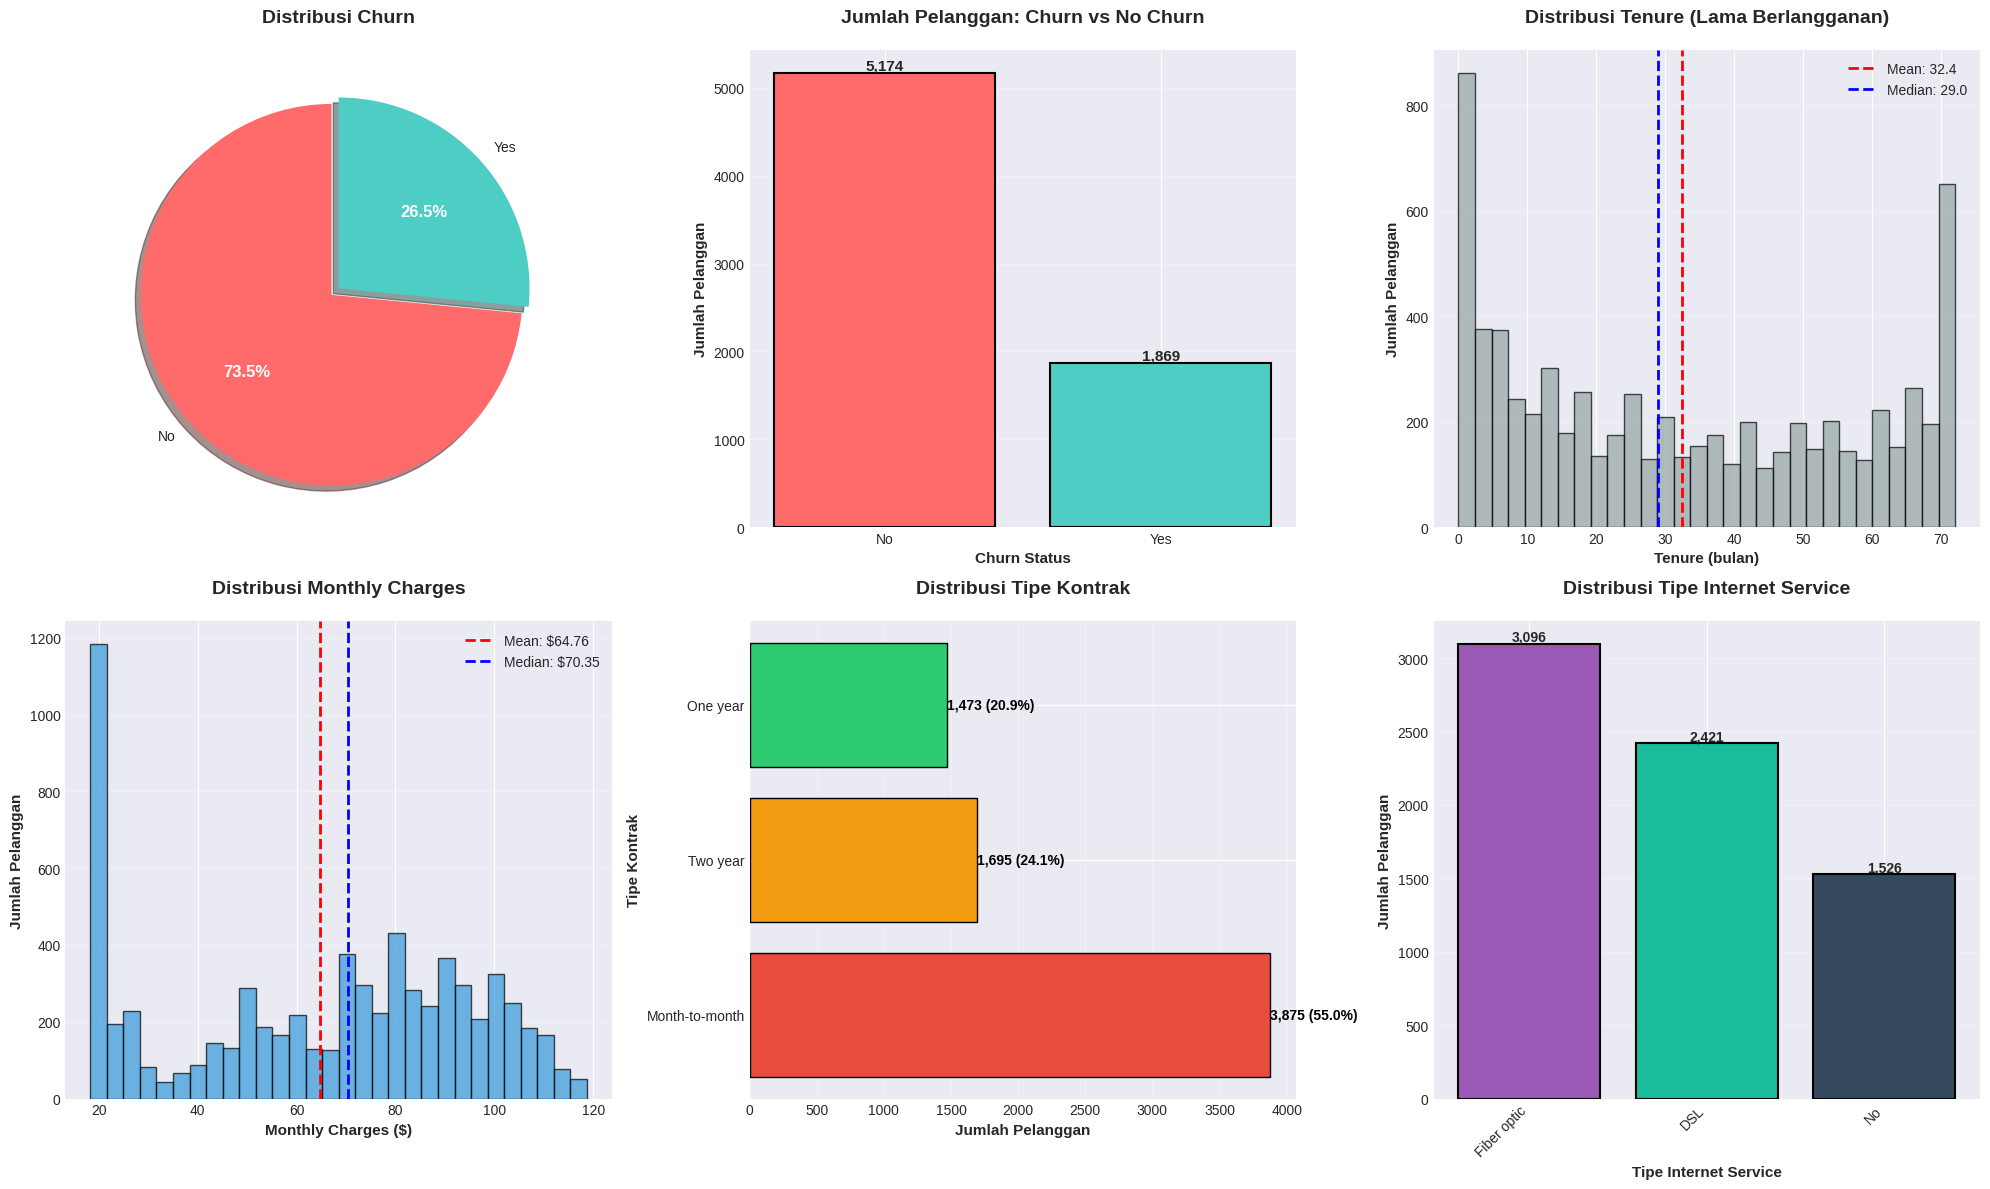


📊 MEMBUAT VISUALISASI TAMBAHAN: CHURN BY CATEGORIES...
   ✓ Visualisasi disimpan sebagai 'telco_churn_by_categories.png'


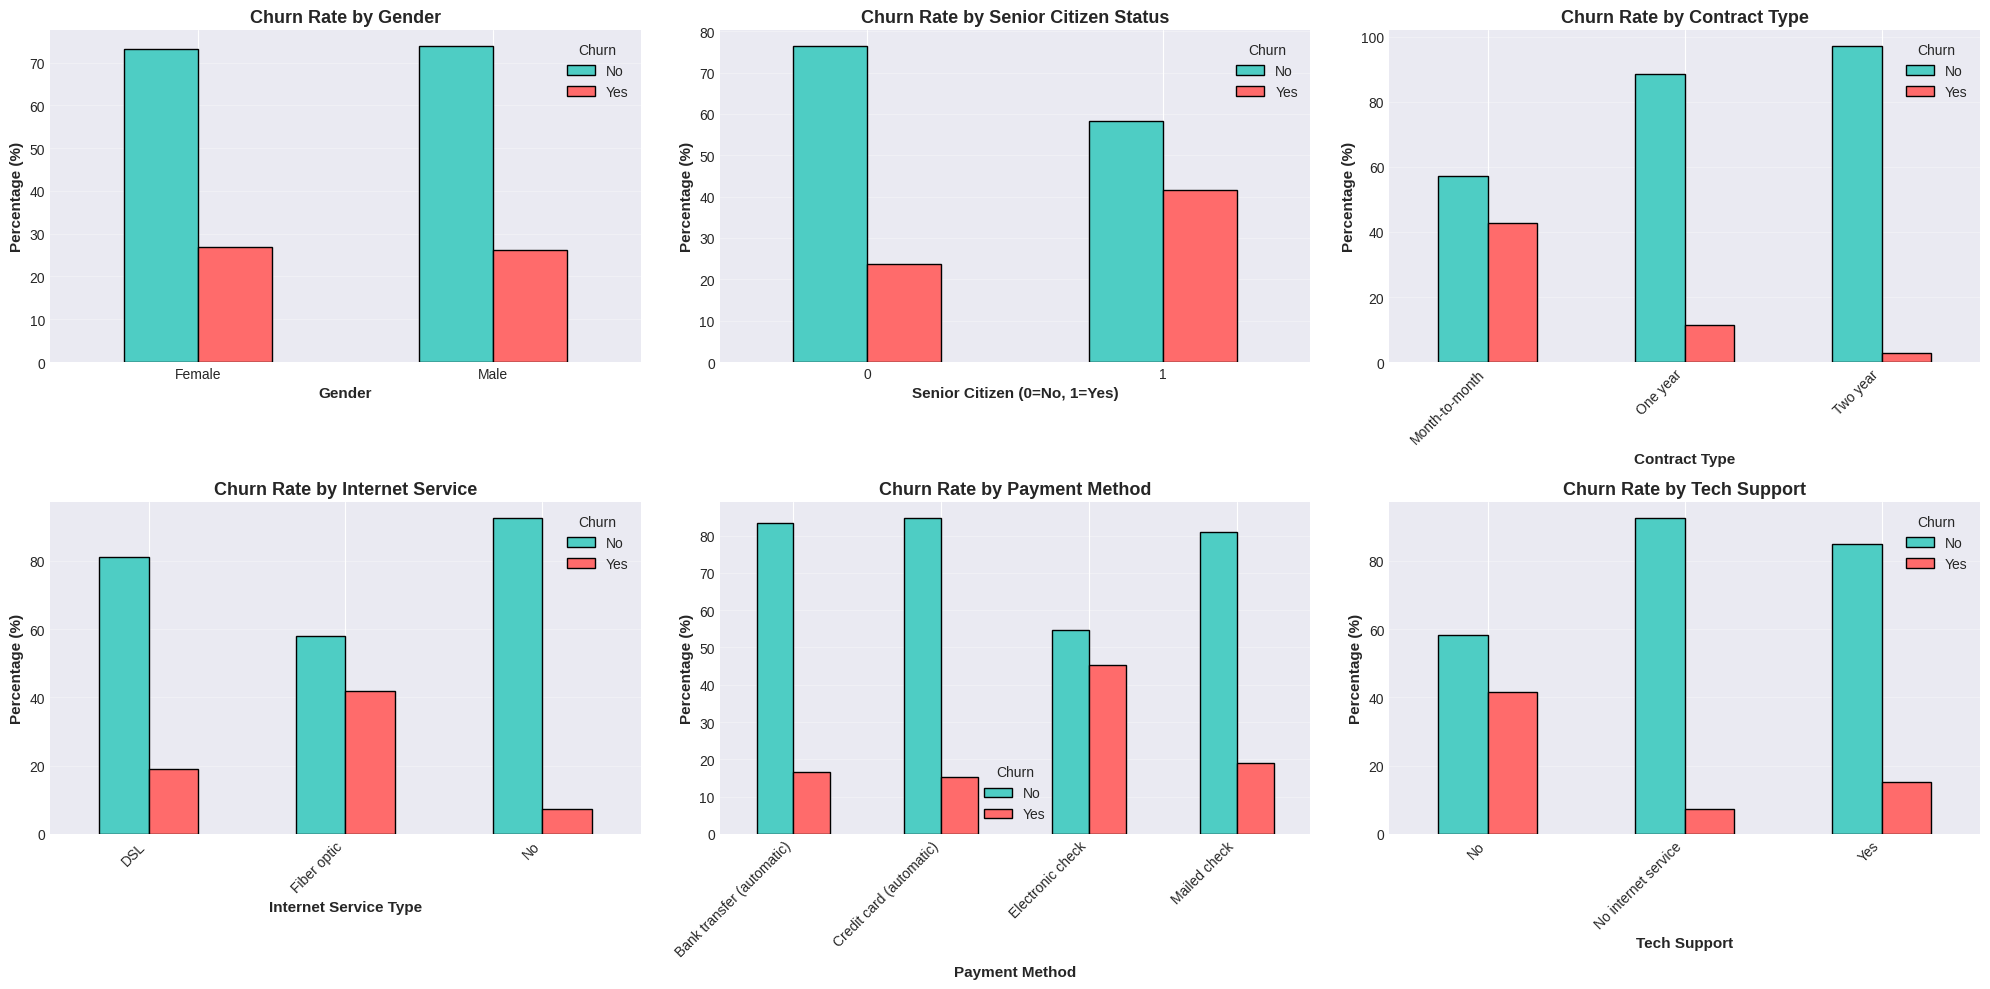


📋 SUMMARY & KEY FINDINGS

✅ DATA LOADING & STRUCTURE:
   • Dataset berhasil dimuat dengan 7,043 baris dan 22 kolom
   • Terdapat 4 numerical features dan 17 categorical features

✅ DATA QUALITY:
   • Missing values: ✓ Tidak ada
   • Duplicate data: ✓ Tidak ada
   • TotalCharges issue: ⚠️ Perlu konversi dari string ke numeric

📊 KEY STATISTICS:
   • Churn Rate: 26.54%
   • Rata-rata Tenure: 32.4 bulan
   • Rata-rata Monthly Charges: $64.76
   • Median Monthly Charges: $70.35

🎯 INITIAL INSIGHTS:
   • Pelanggan dengan kontrak month-to-month tampak lebih rentan churn
   • Senior Citizen menunjukkan churn rate yang lebih tinggi
   • Payment method Electronic Check berkorelasi dengan churn tinggi
   • Layanan TechSupport sepertinya membantu mengurangi churn

🔜 NEXT STEPS:
   1. Data Cleaning: Handle TotalCharges conversion dan missing values
   2. Feature Engineering: Create new features (tenure groups, service bundles, dll)
   3. Deep Dive Analysis: Analyze correlation dan feature importa

In [ ]:
print(f"\n📊 MEMBUAT VISUALISASI...")

# Create figure with subplots
fig = plt.figure(figsize=(20, 12))

# 6.1 Churn Distribution (Pie Chart)
ax1 = plt.subplot(2, 3, 1)
colors = ['#ff6b6b', '#4ecdc4']
explode = (0.05, 0)
wedges, texts, autotexts = ax1.pie(churn_counts,
                                     labels=churn_counts.index,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     explode=explode,
                                     shadow=True)
ax1.set_title('Distribusi Churn', fontsize=14, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# 6.2 Churn Distribution (Bar Chart)
ax2 = plt.subplot(2, 3, 2)
bars = ax2.bar(churn_counts.index, churn_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Jumlah Pelanggan: Churn vs No Churn', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Churn Status', fontsize=11, fontweight='bold')
ax2.set_ylabel('Jumlah Pelanggan', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# 6.3 Tenure Distribution
ax3 = plt.subplot(2, 3, 3)
ax3.hist(df['tenure'], bins=30, color='#95a5a6', edgecolor='black', alpha=0.7)
ax3.set_title('Distribusi Tenure (Lama Berlangganan)', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Tenure (bulan)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Jumlah Pelanggan', fontsize=11, fontweight='bold')
ax3.axvline(df['tenure'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["tenure"].mean():.1f}')
ax3.axvline(df['tenure'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df["tenure"].median():.1f}')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 6.4 Monthly Charges Distribution
ax4 = plt.subplot(2, 3, 4)
ax4.hist(df['MonthlyCharges'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax4.set_title('Distribusi Monthly Charges', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Monthly Charges ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Jumlah Pelanggan', fontsize=11, fontweight='bold')
ax4.axvline(df['MonthlyCharges'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["MonthlyCharges"].mean():.2f}')
ax4.axvline(df['MonthlyCharges'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: ${df["MonthlyCharges"].median():.2f}')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# 6.5 Contract Type Distribution
ax5 = plt.subplot(2, 3, 5)
contract_counts = df['Contract'].value_counts()
bars = ax5.barh(contract_counts.index, contract_counts.values, color=['#e74c3c', '#f39c12', '#2ecc71'], edgecolor='black')
ax5.set_title('Distribusi Tipe Kontrak', fontsize=14, fontweight='bold', pad=20)
ax5.set_xlabel('Jumlah Pelanggan', fontsize=11, fontweight='bold')
ax5.set_ylabel('Tipe Kontrak', fontsize=11, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax5.text(width, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,} ({width/len(df)*100:.1f}%)',
             ha='left', va='center', fontweight='bold', fontsize=10, color='black')

# 6.6 Internet Service Distribution
ax6 = plt.subplot(2, 3, 6)
internet_counts = df['InternetService'].value_counts()
bars = ax6.bar(range(len(internet_counts)), internet_counts.values,
               color=['#9b59b6', '#1abc9c', '#34495e'], edgecolor='black', linewidth=1.5)
ax6.set_title('Distribusi Tipe Internet Service', fontsize=14, fontweight='bold', pad=20)
ax6.set_xlabel('Tipe Internet Service', fontsize=11, fontweight='bold')
ax6.set_ylabel('Jumlah Pelanggan', fontsize=11, fontweight='bold')
ax6.set_xticks(range(len(internet_counts)))
ax6.set_xticklabels(internet_counts.index, rotation=45, ha='right')
ax6.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('telco_churn_eda_overview.png', dpi=300, bbox_inches='tight')
print(f"   ✓ Visualisasi disimpan sebagai 'telco_churn_eda_overview.png'")
plt.show()

# ============================================================================
# ADDITIONAL VISUALIZATIONS: Churn by Categories
# ============================================================================
print(f"\n📊 MEMBUAT VISUALISASI TAMBAHAN: CHURN BY CATEGORIES...")

fig2 = plt.figure(figsize=(20, 10))

# Gender vs Churn
ax1 = plt.subplot(2, 3, 1)
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=ax1, color=['#4ecdc4', '#ff6b6b'], edgecolor='black')
ax1.set_title('Churn Rate by Gender', fontsize=13, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11, fontweight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax1.legend(title='Churn', labels=['No', 'Yes'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Senior Citizen vs Churn
ax2 = plt.subplot(2, 3, 2)
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_churn.plot(kind='bar', ax=ax2, color=['#4ecdc4', '#ff6b6b'], edgecolor='black')
ax2.set_title('Churn Rate by Senior Citizen Status', fontsize=13, fontweight='bold')
ax2.set_xlabel('Senior Citizen (0=No, 1=Yes)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax2.legend(title='Churn', labels=['No', 'Yes'])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Contract vs Churn
ax3 = plt.subplot(2, 3, 3)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=ax3, color=['#4ecdc4', '#ff6b6b'], edgecolor='black')
ax3.set_title('Churn Rate by Contract Type', fontsize=13, fontweight='bold')
ax3.set_xlabel('Contract Type', fontsize=11, fontweight='bold')
ax3.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax3.legend(title='Churn', labels=['No', 'Yes'])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# Internet Service vs Churn
ax4 = plt.subplot(2, 3, 4)
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=ax4, color=['#4ecdc4', '#ff6b6b'], edgecolor='black')
ax4.set_title('Churn Rate by Internet Service', fontsize=13, fontweight='bold')
ax4.set_xlabel('Internet Service Type', fontsize=11, fontweight='bold')
ax4.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax4.legend(title='Churn', labels=['No', 'Yes'])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.grid(axis='y', alpha=0.3)

# Payment Method vs Churn
ax5 = plt.subplot(2, 3, 5)
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=ax5, color=['#4ecdc4', '#ff6b6b'], edgecolor='black')
ax5.set_title('Churn Rate by Payment Method', fontsize=13, fontweight='bold')
ax5.set_xlabel('Payment Method', fontsize=11, fontweight='bold')
ax5.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax5.legend(title='Churn', labels=['No', 'Yes'])
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.grid(axis='y', alpha=0.3)

# Tech Support vs Churn
ax6 = plt.subplot(2, 3, 6)
tech_churn = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
tech_churn.plot(kind='bar', ax=ax6, color=['#4ecdc4', '#ff6b6b'], edgecolor='black')
ax6.set_title('Churn Rate by Tech Support', fontsize=13, fontweight='bold')
ax6.set_xlabel('Tech Support', fontsize=11, fontweight='bold')
ax6.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax6.legend(title='Churn', labels=['No', 'Yes'])
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('telco_churn_by_categories.png', dpi=300, bbox_inches='tight')
print(f"   ✓ Visualisasi disimpan sebagai 'telco_churn_by_categories.png'")
plt.show()

# ============================================================================
# 7. SUMMARY & KEY FINDINGS
# ============================================================================
print("\n" + "=" * 80)
print("📋 SUMMARY & KEY FINDINGS")
print("=" * 80)

print(f"""
✅ DATA LOADING & STRUCTURE:
   • Dataset berhasil dimuat dengan {df.shape[0]:,} baris dan {df.shape[1]} kolom
   • Terdapat {len(numerical_cols)} numerical features dan {len(categorical_cols)} categorical features

✅ DATA QUALITY:
   • Missing values: {'✓ Tidak ada' if len(missing_df) == 0 else f'⚠️ {len(missing_df)} kolom bermasalah'}
   • Duplicate data: {'✓ Tidak ada' if duplicates == 0 else f'⚠️ {duplicates} baris'}
   • TotalCharges issue: ⚠️ Perlu konversi dari string ke numeric

📊 KEY STATISTICS:
   • Churn Rate: {churn_rate:.2f}%
   • Rata-rata Tenure: {df['tenure'].mean():.1f} bulan
   • Rata-rata Monthly Charges: ${df['MonthlyCharges'].mean():.2f}
   • Median Monthly Charges: ${df['MonthlyCharges'].median():.2f}

🎯 INITIAL INSIGHTS:
   • Pelanggan dengan kontrak month-to-month tampak lebih rentan churn
   • Senior Citizen menunjukkan churn rate yang lebih tinggi
   • Payment method Electronic Check berkorelasi dengan churn tinggi
   • Layanan TechSupport sepertinya membantu mengurangi churn

🔜 NEXT STEPS:
   1. Data Cleaning: Handle TotalCharges conversion dan missing values
   2. Feature Engineering: Create new features (tenure groups, service bundles, dll)
   3. Deep Dive Analysis: Analyze correlation dan feature importance
   4. Model Building: Develop predictive model untuk churn prediction
""")

print("=" * 80)
print("✓ DATA UNDERSTANDING & EDA SELESAI!")
print("=" * 80)

# DATA Preparation

## Backup data dulu

In [ ]:
print("="*80)
print("DATA PREPARATION - TELCO CUSTOMER CHURN")
print("="*80)
# Backup original data
df_original = df.copy()

print(f"✓ Dataset berhasil dimuat!")
print(f"✓ Shape awal: {df.shape[0]:,} baris x {df.shape[1]} kolom")

DATA PREPARATION - TELCO CUSTOMER CHURN
✓ Dataset berhasil dimuat!
✓ Shape awal: 7,043 baris x 22 kolom


## DATA CLEANING

In [ ]:
print("\n" + "="*80)
print("STEP 1: DATA CLEANING")
print("="*80)

# ----------------------------------------
# 1.1 Handle Missing Values
# ----------------------------------------
print("\n📋 1.1 Handling Missing Values")
print("-" * 60)

# Cek missing values awal
print("\n🔍 Missing values sebelum cleaning:")
missing_before = df.isnull().sum()
print(f"Total: {missing_before.sum()}")

# Konversi TotalCharges ke numeric (akan create NaN untuk blank values)
print("\n⚙️ Konversi TotalCharges dari object ke numeric...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek missing setelah konversi
print("\n🔍 Missing values setelah konversi TotalCharges:")
missing_after = df.isnull().sum()
print(missing_after[missing_after > 0])

# Handle missing TotalCharges
# Logic: Jika TotalCharges kosong, isi dengan MonthlyCharges (asumsi pelanggan baru)
print("\n⚙️ Mengisi missing TotalCharges...")
print(f"   Missing values: {df['TotalCharges'].isnull().sum()}")

# Lihat karakteristik data yang missing
print("\n📊 Karakteristik data dengan TotalCharges missing:")
missing_data = df[df['TotalCharges'].isnull()]
print(f"   Jumlah: {len(missing_data)}")
print(f"   Rata-rata tenure: {missing_data['tenure'].mean():.1f} bulan")
print(f"   Rata-rata MonthlyCharges: ${missing_data['MonthlyCharges'].mean():.2f}")

# Isi missing values dengan MonthlyCharges (pelanggan baru dengan tenure 0)
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

print(f"✓ Missing values telah diisi dengan MonthlyCharges")
print(f"✓ Total missing values sekarang: {df.isnull().sum().sum()}")

# ----------------------------------------
# 1.2 Fix Data Types
# ----------------------------------------
print("\n📋 1.2 Fixing Data Types")
print("-" * 60)

print("\n🔍 Tipe data sebelum perbaikan:")
print(df.dtypes)

# Pastikan TotalCharges sudah numeric
print(f"\n✓ TotalCharges: {df['TotalCharges'].dtype} (sudah numeric)")

# Convert SeniorCitizen ke categorical untuk consistency
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({'0': 'No', '1': 'Yes'})
print(f"✓ SeniorCitizen: dikonversi ke categorical (Yes/No)")

# ----------------------------------------
# 1.3 Remove Duplicates
# ----------------------------------------
print("\n📋 1.3 Removing Duplicates")
print("-" * 60)

duplicates_before = df.duplicated().sum()
print(f"\n🔍 Jumlah duplikat: {duplicates_before}")

if duplicates_before > 0:
    df.drop_duplicates(inplace=True)
    print(f"✓ {duplicates_before} duplikat dihapus")
else:
    print("✓ Tidak ada duplikat yang perlu dihapus")

print(f"✓ Shape setelah remove duplicates: {df.shape[0]:,} baris x {df.shape[1]} kolom")

# ----------------------------------------
# 1.4 Standardize Text
# ----------------------------------------
print("\n 1.4 Standardizing Text")
print("-" * 60)

# List kolom categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Exclude ID

print(f"\n Kolom categorical yang akan distandardisasi: {len(categorical_cols)}")

# Standardisasi: trim whitespace dan consistent casing
for col in categorical_cols:
    df[col] = df[col].str.strip()  # Remove leading/trailing spaces
    # Keep original casing untuk readability

print("✓ Text telah distandardisasi (whitespace removed)")

# Cek unique values di setiap kolom untuk memastikan consistency
print("\n Sample unique values per kolom:")
for col in categorical_cols[:5]:  # Show first 5
    print(f"   {col}: {df[col].unique()[:3]}")


STEP 1: DATA CLEANING

📋 1.1 Handling Missing Values
------------------------------------------------------------

🔍 Missing values sebelum cleaning:
Total: 0

⚙️ Konversi TotalCharges dari object ke numeric...

🔍 Missing values setelah konversi TotalCharges:
TotalCharges    11
dtype: int64

⚙️ Mengisi missing TotalCharges...
   Missing values: 11

📊 Karakteristik data dengan TotalCharges missing:
   Jumlah: 11
   Rata-rata tenure: 0.0 bulan
   Rata-rata MonthlyCharges: $41.42
✓ Missing values telah diisi dengan MonthlyCharges
✓ Total missing values sekarang: 0

📋 1.2 Fixing Data Types
------------------------------------------------------------

🔍 Tipe data sebelum perbaikan:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
Devic

## OUTLIER DETECTION & HANDLING


STEP 2: OUTLIER DETECTION & HANDLING

📋 2.1 Outlier Detection (IQR Method)
------------------------------------------------------------

📊 tenure:
   Q1: 9.00, Q3: 55.00, IQR: 46.00
   Bounds: [-60.00, 124.00]
   Outliers: 0 (0.00%)

📊 MonthlyCharges:
   Q1: 35.50, Q3: 89.85, IQR: 54.35
   Bounds: [-46.02, 171.38]
   Outliers: 0 (0.00%)

📊 TotalCharges:
   Q1: 398.55, Q3: 3786.60, IQR: 3388.05
   Bounds: [-4683.52, 8868.67]
   Outliers: 0 (0.00%)

📋 Ringkasan Outlier Detection:
        Column     Q1      Q3     IQR  Lower Bound  Upper Bound  Num Outliers  Percentage
        tenure   9.00   55.00   46.00      -60.000      124.000             0         0.0
MonthlyCharges  35.50   89.85   54.35      -46.025      171.375             0         0.0
  TotalCharges 398.55 3786.60 3388.05    -4683.525     8868.675             0         0.0

 2.2 Visualisasi Outliers (Boxplot)
------------------------------------------------------------


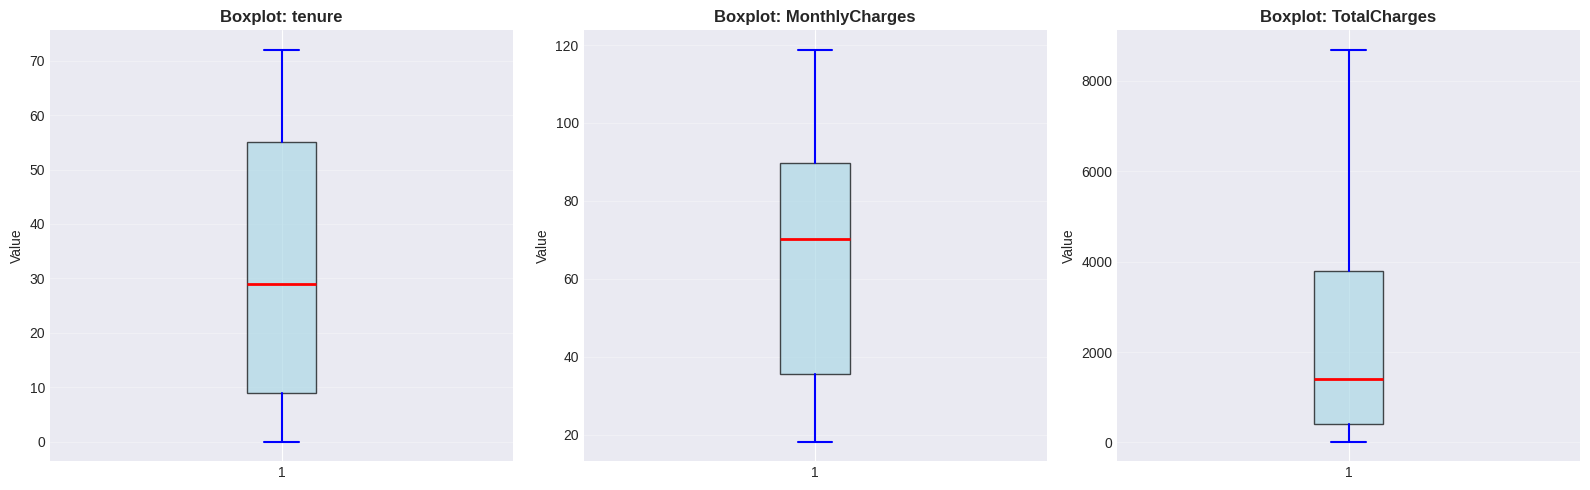


 2.3 Handling Outliers
------------------------------------------------------------

 KEPUTUSAN BISNIS:
   • tenure outliers (nilai 0 atau sangat rendah): KEEP - pelanggan baru valid
   • MonthlyCharges outliers: KEEP - variasi harga paket layanan wajar
   • TotalCharges outliers: KEEP - hasil akumulasi dari tenure × charges

✓ Tidak ada outlier yang dihapus (semua outlier adalah data valid)

 Membuat flag kolom 'is_outlier' untuk analisis...
✓ Flag 'is_outlier' telah ditambahkan
   Total records dengan outlier: 0


In [ ]:
print("\n" + "="*80)
print("STEP 2: OUTLIER DETECTION & HANDLING")
print("="*80)

# Kolom numeric untuk cek outlier
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# ----------------------------------------
# 2.1 IQR Method
# ----------------------------------------
print("\n📋 2.1 Outlier Detection (IQR Method)")
print("-" * 60)

outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    pct_outliers = (num_outliers / len(df)) * 100

    outlier_summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Num Outliers': num_outliers,
        'Percentage': pct_outliers
    })

    print(f"\n📊 {col}:")
    print(f"   Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"   Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Outliers: {num_outliers} ({pct_outliers:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
print("\n📋 Ringkasan Outlier Detection:")
print(outlier_df.to_string(index=False))

# ----------------------------------------
# 2.2 Visualisasi Outliers
# ----------------------------------------
print("\n 2.2 Visualisasi Outliers (Boxplot)")
print("-" * 60)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue', linewidth=1.5),
                      capprops=dict(color='blue', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red',
                                     markersize=6, alpha=0.5))

    axes[idx].set_title(f'Boxplot: {col}', fontsize=12, weight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------
# 2.3 Handle Outliers
# ----------------------------------------
print("\n 2.3 Handling Outliers")
print("-" * 60)

print("\n KEPUTUSAN BISNIS:")
print("   • tenure outliers (nilai 0 atau sangat rendah): KEEP - pelanggan baru valid")
print("   • MonthlyCharges outliers: KEEP - variasi harga paket layanan wajar")
print("   • TotalCharges outliers: KEEP - hasil akumulasi dari tenure × charges")
print("\n✓ Tidak ada outlier yang dihapus (semua outlier adalah data valid)")

# Tapi kita buat flag untuk identifikasi outlier di dashboard
print("\n Membuat flag kolom 'is_outlier' untuk analisis...")

df['is_outlier'] = 'No'

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), 'is_outlier'] = 'Yes'

print(f"✓ Flag 'is_outlier' telah ditambahkan")
print(f"   Total records dengan outlier: {(df['is_outlier'] == 'Yes').sum()}")

## FEATURE ENGINEERING

In [ ]:
print("\n" + "="*80)
print("STEP 3: FEATURE ENGINEERING")
print("="*80)

# ----------------------------------------
# 3.1 Tenure Group
# ----------------------------------------
print("\n📋 3.1 Creating Tenure_Group")
print("-" * 60)

df['Tenure_Group'] = pd.cut(df['tenure'],
                             bins=[0, 12, 24, 36, 72],
                             labels=['0-12 months', '13-24 months',
                                    '25-36 months', '37+ months'],
                             include_lowest=True)

print("✓ Tenure_Group created")
print("\n📊 Distribusi Tenure_Group:")
print(df['Tenure_Group'].value_counts().sort_index())

# ----------------------------------------
# 3.2 Customer Lifetime Value (CLV)
# ----------------------------------------
print("\n📋 3.2 Creating CLV (Customer Lifetime Value)")
print("-" * 60)

df['CLV'] = df['MonthlyCharges'] * df['tenure']

print("✓ CLV = MonthlyCharges × Tenure")
print(f"\n📊 Statistik CLV:")
print(f"   Mean: ${df['CLV'].mean():.2f}")
print(f"   Median: ${df['CLV'].median():.2f}")
print(f"   Min: ${df['CLV'].min():.2f}")
print(f"   Max: ${df['CLV'].max():.2f}")

# ----------------------------------------
# 3.3 Total Services
# ----------------------------------------
print("\n📋 3.3 Creating TotalServices")
print("-" * 60)

# List service columns
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Hitung jumlah service yang dipake (value = 'Yes')
df['TotalServices'] = 0

for col in service_cols:
    if col == 'InternetService':
        # InternetService count as 1 if not 'No'
        df['TotalServices'] += (df[col] != 'No').astype(int)
    else:
        # Other services count as 1 if 'Yes'
        df['TotalServices'] += (df[col] == 'Yes').astype(int)

print("✓ TotalServices calculated")
print("\n📊 Distribusi TotalServices:")
print(df['TotalServices'].value_counts().sort_index())

# ----------------------------------------
# 3.4 Average Monthly Spend
# ----------------------------------------
print("\n📋 3.4 Creating AvgMonthlySpend")
print("-" * 60)

# Avoid division by zero untuk tenure = 0
df['AvgMonthlySpend'] = df.apply(
    lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0
    else row['MonthlyCharges'],
    axis=1
)

print("✓ AvgMonthlySpend = TotalCharges / Tenure")
print(f"\n📊 Statistik AvgMonthlySpend:")
print(f"   Mean: ${df['AvgMonthlySpend'].mean():.2f}")
print(f"   Median: ${df['AvgMonthlySpend'].median():.2f}")
print(f"   Correlation with MonthlyCharges: {df['AvgMonthlySpend'].corr(df['MonthlyCharges']):.3f}")

# ----------------------------------------
# 3.5 Additional Features
# ----------------------------------------
print("\n📋 3.5 Creating Additional Features")
print("-" * 60)

# Has Partner or Dependents
df['HasFamilyTies'] = df.apply(
    lambda row: 'Yes' if row['Partner'] == 'Yes' or row['Dependents'] == 'Yes'
    else 'No', axis=1
)
print("✓ HasFamilyTies: Yes jika punya Partner ATAU Dependents")

# Premium Customer (high charges + long tenure)
df['PremiumCustomer'] = df.apply(
    lambda row: 'Yes' if row['MonthlyCharges'] > 70 and row['tenure'] > 24
    else 'No', axis=1
)
print("✓ PremiumCustomer: Yes jika MonthlyCharges > $70 dan tenure > 24 bulan")

# Contract Risk Level
contract_risk_map = {
    'Month-to-month': 'High',
    'One year': 'Medium',
    'Two year': 'Low'
}
df['ContractRiskLevel'] = df['Contract'].map(contract_risk_map)
print("✓ ContractRiskLevel: High/Medium/Low berdasarkan tipe kontrak")

# Payment Method Risk
payment_risk_map = {
    'Electronic check': 'High',
    'Mailed check': 'Medium',
    'Bank transfer (automatic)': 'Low',
    'Credit card (automatic)': 'Low'
}
df['PaymentRisk'] = df['PaymentMethod'].map(payment_risk_map)
print("✓ PaymentRisk: High/Medium/Low berdasarkan payment method")

print(f"\n✓ Total fitur baru yang dibuat: 8")


STEP 3: FEATURE ENGINEERING

📋 3.1 Creating Tenure_Group
------------------------------------------------------------
✓ Tenure_Group created

📊 Distribusi Tenure_Group:
Tenure_Group
0-12 months     2186
13-24 months    1024
25-36 months     832
37+ months      3001
Name: count, dtype: int64

📋 3.2 Creating CLV (Customer Lifetime Value)
------------------------------------------------------------
✓ CLV = MonthlyCharges × Tenure

📊 Statistik CLV:
   Mean: $2279.58
   Median: $1393.60
   Min: $0.00
   Max: $8550.00

📋 3.3 Creating TotalServices
------------------------------------------------------------
✓ TotalServices calculated

📊 Distribusi TotalServices:
TotalServices
1    1264
2     859
3     846
4     965
5     922
6     908
7     676
8     395
9     208
Name: count, dtype: int64

📋 3.4 Creating AvgMonthlySpend
------------------------------------------------------------
✓ AvgMonthlySpend = TotalCharges / Tenure

📊 Statistik AvgMonthlySpend:
   Mean: $64.76
   Median: $70.34
   Co

## FINAL DATA VALIDATION

In [ ]:
print("\n" + "="*80)
print("STEP 4: FINAL DATA VALIDATION")
print("="*80)

print(f"\n📊 Shape final: {df.shape[0]:,} baris x {df.shape[1]} kolom")
print(f"\n🔍 Missing values check:")
final_missing = df.isnull().sum().sum()
print(f"   Total missing: {final_missing}")

if final_missing > 0:
    print("\n⚠️ Kolom dengan missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

print(f"\n✓ Data siap untuk export!")

# Display sample
print("\n📋 Sample Data (5 baris pertama dengan fitur baru):")
display_cols = ['customerID', 'tenure', 'Tenure_Group', 'MonthlyCharges',
                'TotalCharges', 'CLV', 'TotalServices', 'AvgMonthlySpend',
                'ContractRiskLevel', 'Churn']
print(df[display_cols].head())


STEP 4: FINAL DATA VALIDATION

📊 Shape final: 7,043 baris x 31 kolom

🔍 Missing values check:
   Total missing: 0

✓ Data siap untuk export!

📋 Sample Data (5 baris pertama dengan fitur baru):
   customerID  tenure  Tenure_Group  MonthlyCharges  TotalCharges      CLV  \
0  7590-VHVEG       1   0-12 months           29.85         29.85    29.85   
1  5575-GNVDE      34  25-36 months           56.95       1889.50  1936.30   
2  3668-QPYBK       2   0-12 months           53.85        108.15   107.70   
3  7795-CFOCW      45    37+ months           42.30       1840.75  1903.50   
4  9237-HQITU       2   0-12 months           70.70        151.65   141.40   

   TotalServices  AvgMonthlySpend ContractRiskLevel Churn  
0              2        29.850000              High    No  
1              4        55.573529            Medium    No  
2              4        54.075000              High   Yes  
3              4        40.905556            Medium    No  
4              2        75.825000    

## EXPORT CLEANED DATA

In [ ]:
print("\n" + "="*80)
print("STEP 5: EXPORT CLEANED DATA")
print("="*80)

# Export to CSV
output_filename = 'telco_customer_churn_cleaned.csv'
df.to_csv(output_filename, index=False)
print(f"\n✓ Data exported to: {output_filename}")
print(f"   File size: {df.shape[0]:,} rows x {df.shape[1]} columns")

# Summary statistics
print("\n📊 Export Summary:")
print(f"   Original rows: {df_original.shape[0]:,}")
print(f"   Final rows: {df.shape[0]:,}")
print(f"   Rows removed: {df_original.shape[0] - df.shape[0]:,}")
print(f"   Original columns: {df_original.shape[1]}")
print(f"   Final columns: {df.shape[1]}")
print(f"   New columns added: {df.shape[1] - df_original.shape[1]}")


STEP 5: EXPORT CLEANED DATA

✓ Data exported to: telco_customer_churn_cleaned.csv
   File size: 7,043 rows x 31 columns

📊 Export Summary:
   Original rows: 7,043
   Final rows: 7,043
   Rows removed: 0
   Original columns: 22
   Final columns: 31
   New columns added: 9


# EVALUATION - EXPLORATORY DATA ANALYSIS


CHURN RATE

📊 Total Pelanggan: 7,043
❌ Churned: 1,869 (26.54%)
✅ Retained: 5,174 (73.46%)


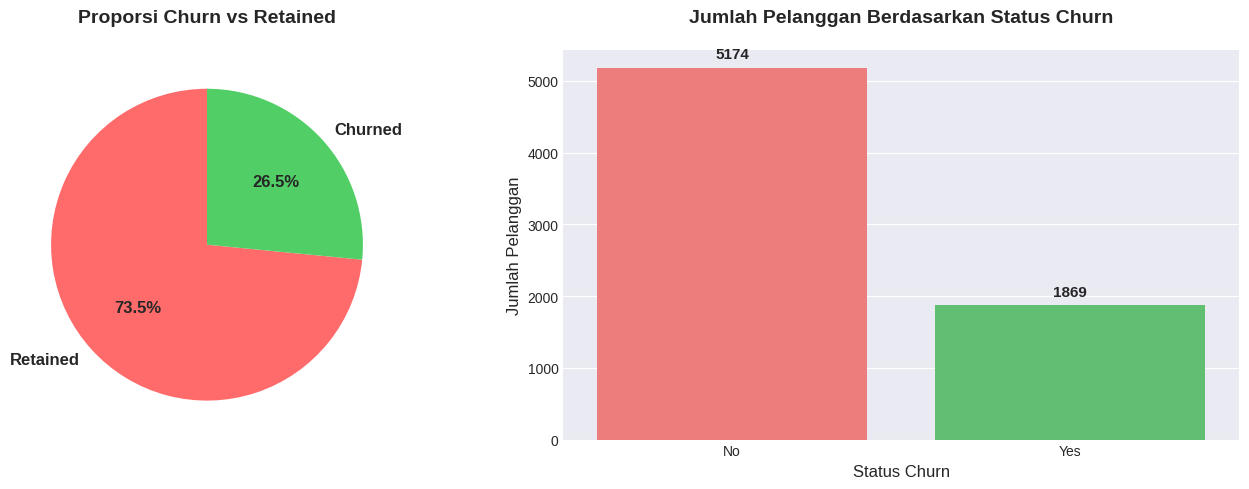


💡 INSIGHT: Churn rate sebesar 26.54% menunjukkan bahwa hampir 1 dari 4 pelanggan berhenti berlangganan!


In [ ]:
print("\n" + "="*70)
print("CHURN RATE")
print("="*70)

churn_counts = df['Churn'].value_counts()
churn_rate = (churn_counts['Yes'] / len(df)) * 100

print(f"\n📊 Total Pelanggan: {len(df):,}")
print(f"❌ Churned: {churn_counts['Yes']:,} ({churn_rate:.2f}%)")
print(f"✅ Retained: {churn_counts['No']:,} ({100-churn_rate:.2f}%)")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#ff6b6b', '#51cf66']
axes[0].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Proporsi Churn vs Retained', fontsize=14, weight='bold', pad=20)

# Bar chart
sns.countplot(data=df, x='Churn', palette=colors, ax=axes[1])
axes[1].set_title('Jumlah Pelanggan Berdasarkan Status Churn', fontsize=14, weight='bold', pad=20)
axes[1].set_xlabel('Status Churn', fontsize=12)
axes[1].set_ylabel('Jumlah Pelanggan', fontsize=12)

# Tambahkan angka di atas bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', padding=5, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 INSIGHT: Churn rate sebesar {churn_rate:.2f}% menunjukkan bahwa hampir 1 dari 4 pelanggan berhenti berlangganan!")

# UNIVARIATE ANALYSIS - CHURN BY CATEGORICAL FEATURES

1️⃣ UNIVARIATE ANALYSIS - CHURN BY CATEGORICAL FEATURES

📌 Contract Type
------------------------------------------------------------
                Churned  Total  Churn_Rate
Contract                                  
Month-to-month     1655   3875   42.709677
One year            166   1473   11.269518
Two year             48   1695    2.831858


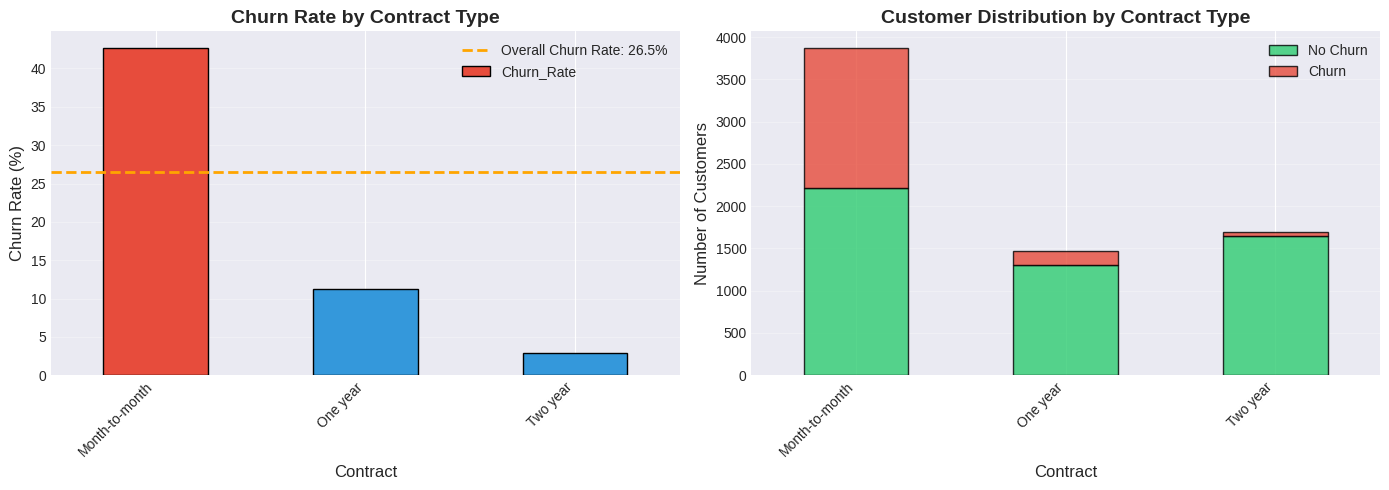


📌 Payment Method
------------------------------------------------------------
                           Churned  Total  Churn_Rate
PaymentMethod                                        
Electronic check              1071   2365   45.285412
Mailed check                   308   1612   19.106700
Bank transfer (automatic)      258   1544   16.709845
Credit card (automatic)        232   1522   15.243101


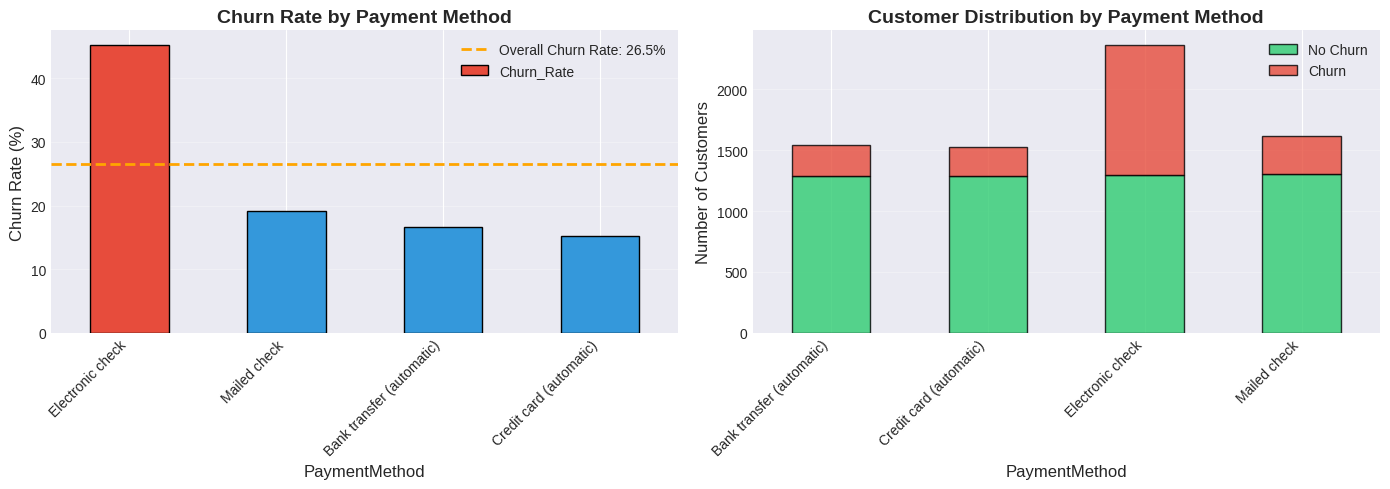


📌 Internet Service Type
------------------------------------------------------------
                 Churned  Total  Churn_Rate
InternetService                            
Fiber optic         1297   3096   41.892765
DSL                  459   2421   18.959108
No                   113   1526    7.404980


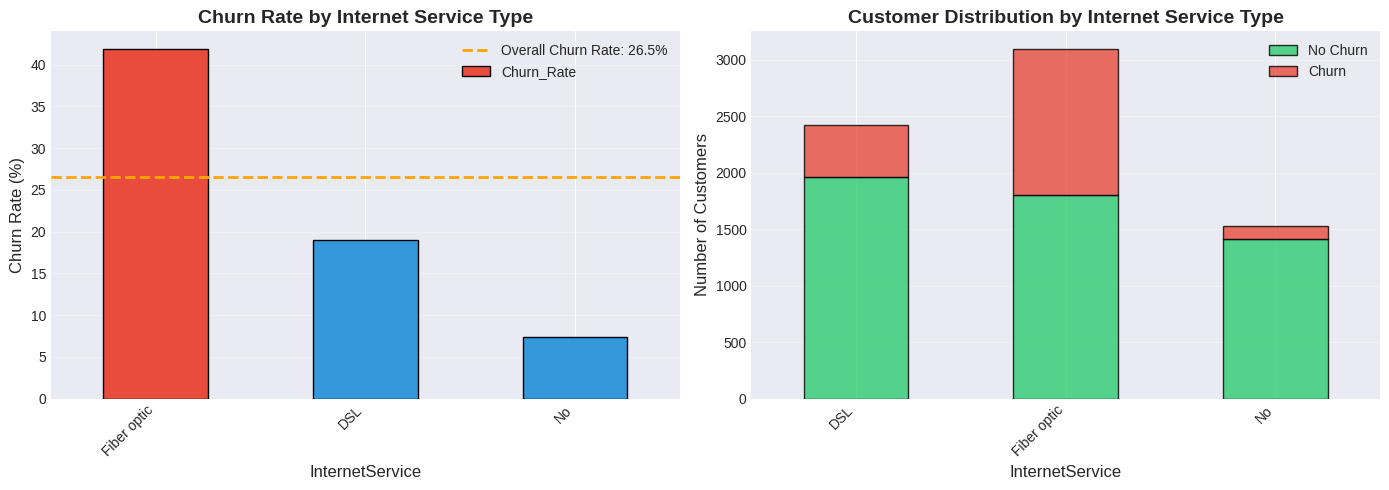


📌 Tenure Group
------------------------------------------------------------
              Churned  Total  Churn_Rate
Tenure_Group                            
0-12 months      1037   2175   47.678161
13-24 months      294   1024   28.710938
25-36 months      180    832   21.634615
37+ months        358   3001   11.929357


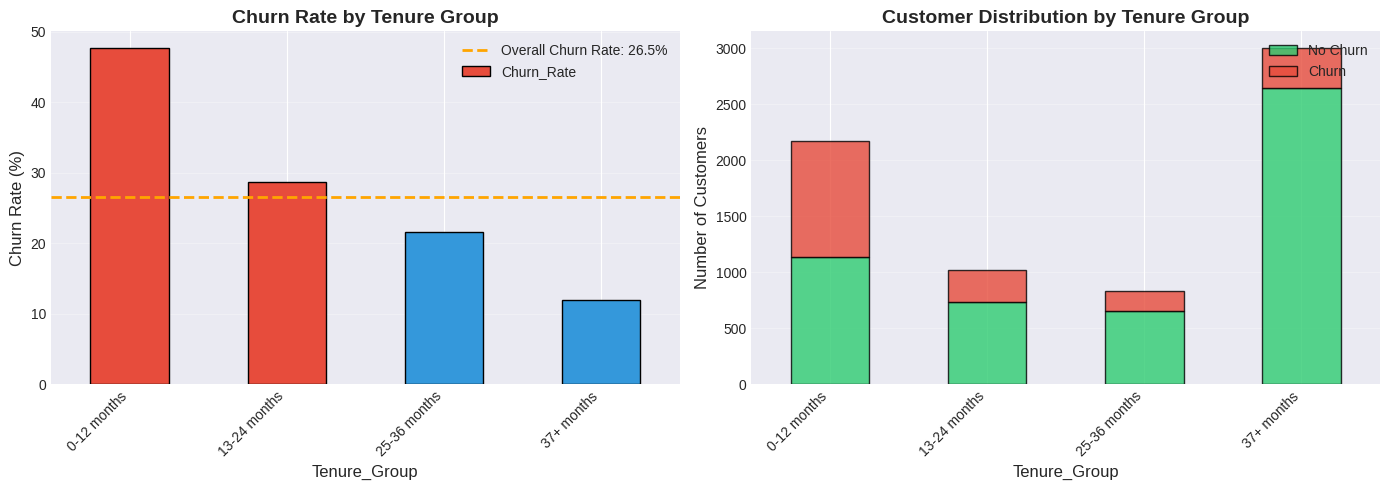


📌 Senior Citizen Status
------------------------------------------------------------
               Churned  Total  Churn_Rate
SeniorCitizen                            
Yes                476   1142   41.681261
No                1393   5901   23.606168


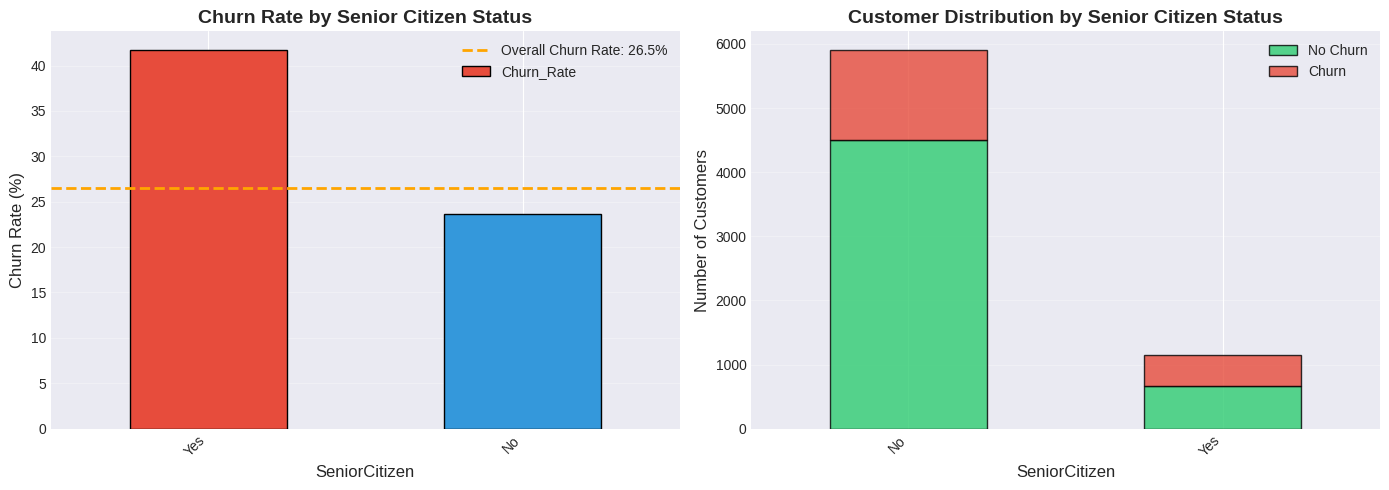

In [ ]:

print("="*70)
print("1️ UNIVARIATE ANALYSIS - CHURN BY CATEGORICAL FEATURES")
print("="*70)

# Create a binary Churn column for numerical analysis
df['Churn_Binary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate overall churn rate for reference in plots
overall_churn_rate = (df['Churn_Binary'].sum() / len(df)) * 100

# Function untuk analisis univariate
def analyze_churn_by_feature(df, feature, title):
    """Analisis churn rate berdasarkan satu feature"""
    churn_by_feature = df.groupby(feature)['Churn_Binary'].agg(['sum', 'count', 'mean'])
    churn_by_feature.columns = ['Churned', 'Total', 'Churn_Rate']
    churn_by_feature['Churn_Rate'] = churn_by_feature['Churn_Rate'] * 100
    churn_by_feature = churn_by_feature.sort_values('Churn_Rate', ascending=False)

    print(f"\n {title}")
    print("-" * 60)
    print(churn_by_feature.to_string())

    # Visualisasi
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Bar chart - Churn Rate
    ax1 = axes[0]
    colors = ['#e74c3c' if rate > overall_churn_rate else '#3498db'
              for rate in churn_by_feature['Churn_Rate']]
    churn_by_feature['Churn_Rate'].plot(kind='bar', ax=ax1, color=colors, edgecolor='black')
    ax1.axhline(overall_churn_rate, color='orange', linestyle='--', linewidth=2,
                label=f'Overall Churn Rate: {overall_churn_rate:.1f}%')
    ax1.set_title(f'Churn Rate by {title}', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Churn Rate (%)', fontsize=12)
    ax1.set_xlabel(feature, fontsize=12)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Stacked bar - Distribution
    ax2 = axes[1]
    churn_data = df.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    churn_data.plot(kind='bar', stacked=True, ax=ax2, color=['#2ecc71', '#e74c3c'],
                    edgecolor='black', alpha=0.8)
    ax2.set_title(f'Customer Distribution by {title}', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Number of Customers', fontsize=12)
    ax2.set_xlabel(feature, fontsize=12)
    ax2.legend(['No Churn', 'Churn'], loc='upper right')
    ax2.grid(axis='y', alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    return churn_by_feature

# 1.1 Contract Type
contract_analysis = analyze_churn_by_feature(df, 'Contract', 'Contract Type')

# 1.2 Payment Method
payment_analysis = analyze_churn_by_feature(df, 'PaymentMethod', 'Payment Method')

# 1.3 Internet Service
internet_analysis = analyze_churn_by_feature(df, 'InternetService', 'Internet Service Type')

# 1.4 Tenure Group (create feature first)
df['Tenure_Group'] = pd.cut(df['tenure'],
                             bins=[0, 12, 24, 36, 72],
                             labels=['0-12 months', '13-24 months', '25-36 months', '37+ months'])
tenure_analysis = analyze_churn_by_feature(df, 'Tenure_Group', 'Tenure Group')

# 1.5 Senior Citizen
senior_analysis = analyze_churn_by_feature(df, 'SeniorCitizen', 'Senior Citizen Status')

# BIVARIATE ANALYSIS - NUMERICAL FEATURES VS CHURN


BIVARIATE ANALYSIS - NUMERICAL FEATURES VS CHURN

📌 Monthly Charges vs Churn
------------------------------------------------------------
Churned Customers - Mean: $74.44, Median: $79.65
Retained Customers - Mean: $61.27, Median: $64.43
Difference: $13.18


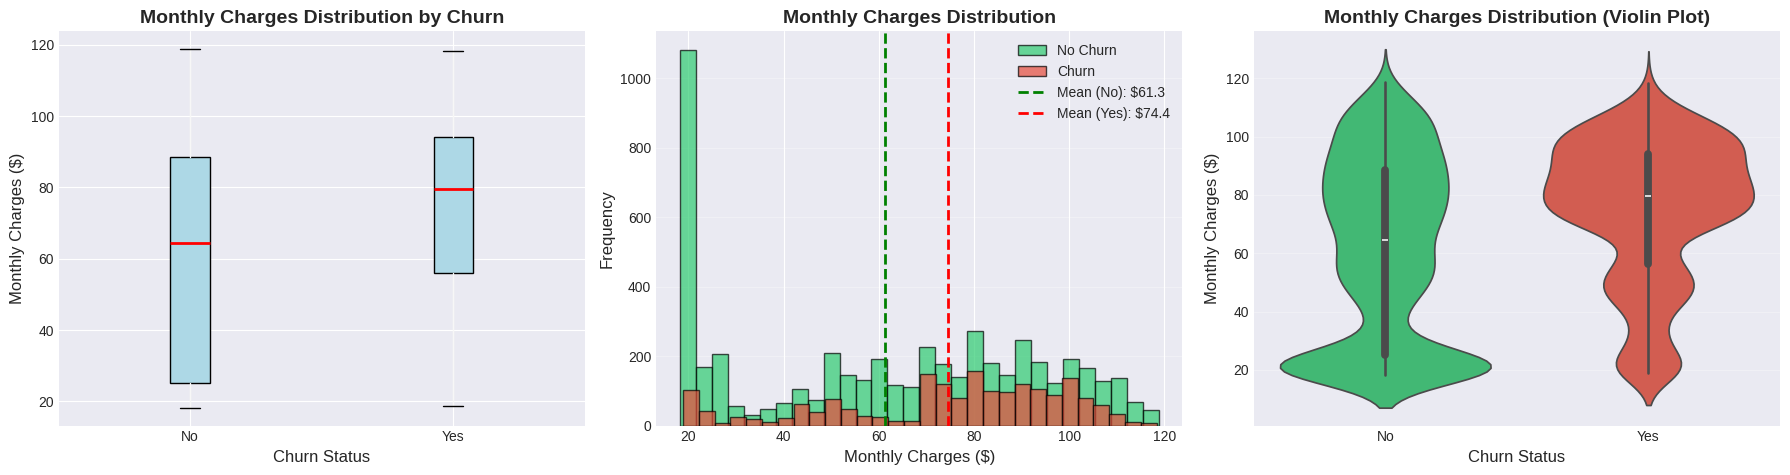


📌 Total Charges vs Churn
------------------------------------------------------------
Churned Customers - Mean: $1531.80, Median: $703.55
Retained Customers - Mean: $2550.00, Median: $1679.53
Difference: $-1018.20


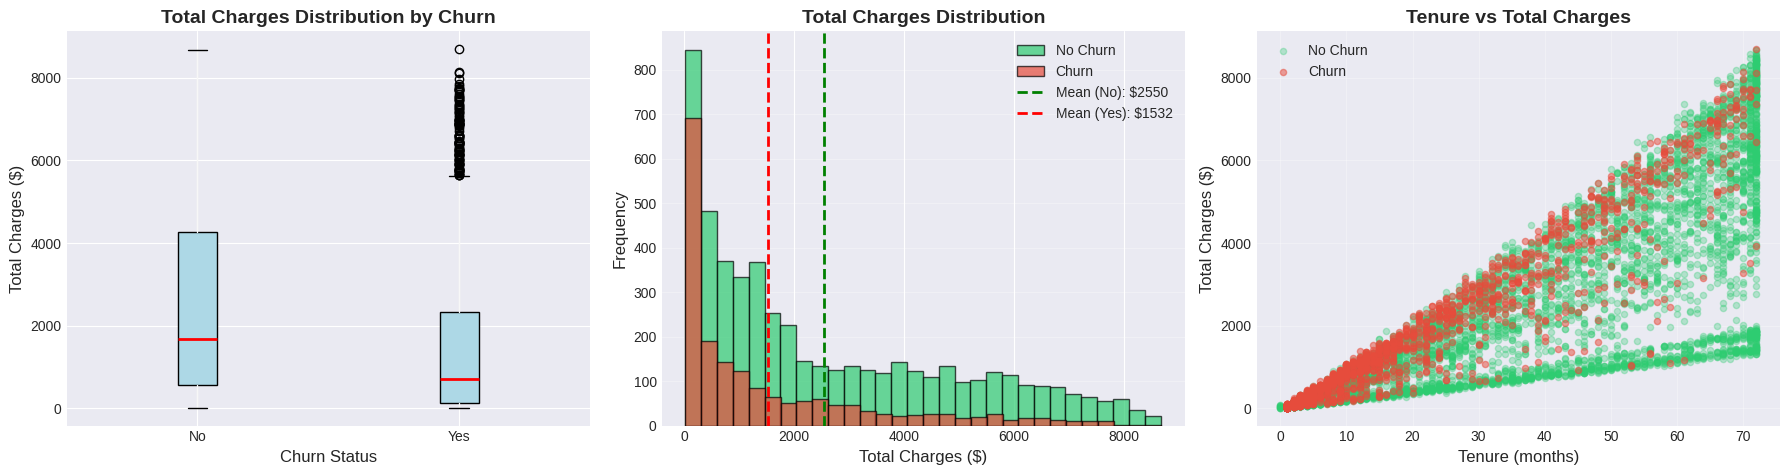


📌 Tenure vs Churn
------------------------------------------------------------
Churned Customers - Mean Tenure: 18.0 months, Median: 10 months
Retained Customers - Mean Tenure: 37.6 months, Median: 38 months


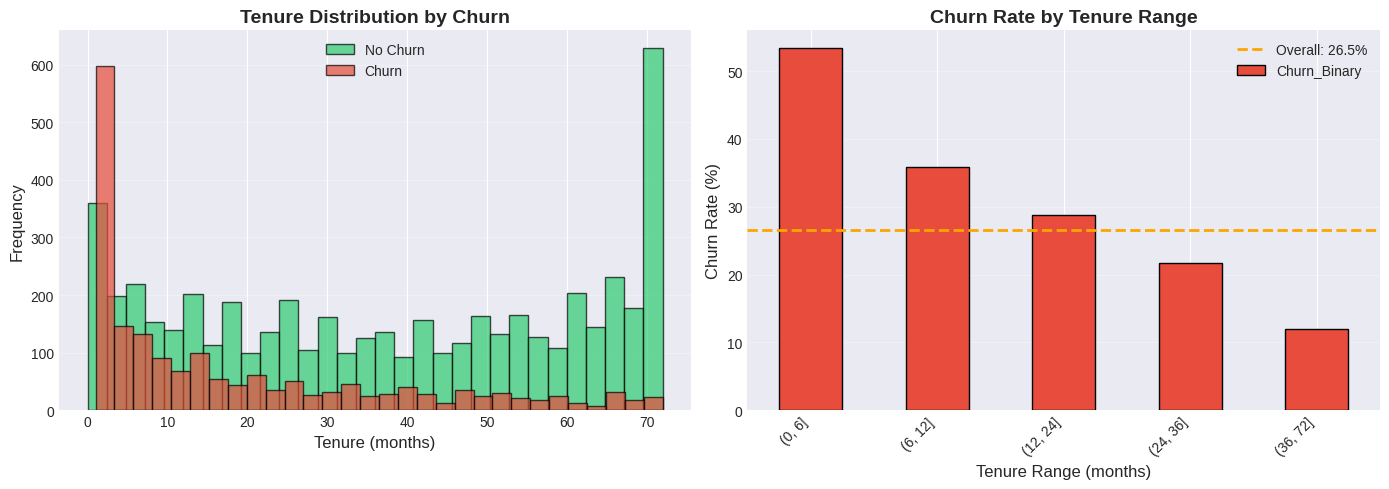

In [ ]:

print("\n" + "="*70)
print("BIVARIATE ANALYSIS - NUMERICAL FEATURES VS CHURN")
print("="*70)

# 2.1 Monthly Charges vs Churn
print("\n📌 Monthly Charges vs Churn")
print("-" * 60)

churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

print(f"Churned Customers - Mean: ${churned.mean():.2f}, Median: ${churned.median():.2f}")
print(f"Retained Customers - Mean: ${not_churned.mean():.2f}, Median: ${not_churned.median():.2f}")
print(f"Difference: ${churned.mean() - not_churned.mean():.2f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot
ax1 = axes[0]
df.boxplot(column='MonthlyCharges', by='Churn', ax=ax1, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red', linewidth=2))
ax1.set_title('Monthly Charges Distribution by Churn', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn Status', fontsize=12)
ax1.set_ylabel('Monthly Charges ($)', fontsize=12)
plt.suptitle('')

# Histogram
ax2 = axes[1]
ax2.hist(not_churned, bins=30, alpha=0.7, label='No Churn', color='#2ecc71', edgecolor='black')
ax2.hist(churned, bins=30, alpha=0.7, label='Churn', color='#e74c3c', edgecolor='black')
ax2.axvline(not_churned.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean (No): ${not_churned.mean():.1f}')
ax2.axvline(churned.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean (Yes): ${churned.mean():.1f}')
ax2.set_title('Monthly Charges Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Monthly Charges ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Violin plot
ax3 = axes[2]
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', ax=ax3, palette=['#2ecc71', '#e74c3c'])
ax3.set_title('Monthly Charges Distribution (Violin Plot)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Churn Status', fontsize=12)
ax3.set_ylabel('Monthly Charges ($)', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2.2 Total Charges vs Churn
print("\n📌 Total Charges vs Churn")
print("-" * 60)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna(subset=['TotalCharges'])

churned_total = df_clean[df_clean['Churn'] == 'Yes']['TotalCharges']
not_churned_total = df_clean[df_clean['Churn'] == 'No']['TotalCharges']

print(f"Churned Customers - Mean: ${churned_total.mean():.2f}, Median: ${churned_total.median():.2f}")
print(f"Retained Customers - Mean: ${not_churned_total.mean():.2f}, Median: ${not_churned_total.median():.2f}")
print(f"Difference: ${churned_total.mean() - not_churned_total.mean():.2f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot
ax1 = axes[0]
df_clean.boxplot(column='TotalCharges', by='Churn', ax=ax1, patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='red', linewidth=2))
ax1.set_title('Total Charges Distribution by Churn', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn Status', fontsize=12)
ax1.set_ylabel('Total Charges ($)', fontsize=12)
plt.suptitle('')

# Histogram
ax2 = axes[1]
ax2.hist(not_churned_total, bins=30, alpha=0.7, label='No Churn', color='#2ecc71', edgecolor='black')
ax2.hist(churned_total, bins=30, alpha=0.7, label='Churn', color='#e74c3c', edgecolor='black')
ax2.axvline(not_churned_total.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean (No): ${not_churned_total.mean():.0f}')
ax2.axvline(churned_total.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean (Yes): ${churned_total.mean():.0f}')
ax2.set_title('Total Charges Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Charges ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Scatter plot
ax3 = axes[2]
ax3.scatter(df_clean[df_clean['Churn']=='No']['tenure'],
           df_clean[df_clean['Churn']=='No']['TotalCharges'],
           alpha=0.3, c='#2ecc71', label='No Churn', s=20)
ax3.scatter(df_clean[df_clean['Churn']=='Yes']['tenure'],
           df_clean[df_clean['Churn']=='Yes']['TotalCharges'],
           alpha=0.5, c='#e74c3c', label='Churn', s=20)
ax3.set_title('Tenure vs Total Charges', fontsize=14, fontweight='bold')
ax3.set_xlabel('Tenure (months)', fontsize=12)
ax3.set_ylabel('Total Charges ($)', fontsize=12)
ax3.legend()
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 2.3 Tenure vs Churn
print("\n📌 Tenure vs Churn")
print("-" * 60)

churned_tenure = df[df['Churn'] == 'Yes']['tenure']
not_churned_tenure = df[df['Churn'] == 'No']['tenure']

print(f"Churned Customers - Mean Tenure: {churned_tenure.mean():.1f} months, Median: {churned_tenure.median():.0f} months")
print(f"Retained Customers - Mean Tenure: {not_churned_tenure.mean():.1f} months, Median: {not_churned_tenure.median():.0f} months")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
ax1 = axes[0]
ax1.hist(not_churned_tenure, bins=30, alpha=0.7, label='No Churn', color='#2ecc71', edgecolor='black')
ax1.hist(churned_tenure, bins=30, alpha=0.7, label='Churn', color='#e74c3c', edgecolor='black')
ax1.set_title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tenure (months)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Churn rate by tenure bins
ax2 = axes[1]
tenure_bins = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 36, 72])
churn_by_tenure = df.groupby(tenure_bins)['Churn_Binary'].mean() * 100
churn_by_tenure.plot(kind='bar', ax=ax2, color='#e74c3c', edgecolor='black')
ax2.axhline(overall_churn_rate, color='orange', linestyle='--', linewidth=2,
            label=f'Overall: {overall_churn_rate:.1f}%')
ax2.set_title('Churn Rate by Tenure Range', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tenure Range (months)', fontsize=12)
ax2.set_ylabel('Churn Rate (%)', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# SERVICE COMBINATIONS VS CHURN


3️⃣ SERVICE COMBINATIONS VS CHURN

📌 Total Services Subscribed vs Churn
------------------------------------------------------------
                Churned  Total  Churn_Rate
Total_Services                            
0                   475   2219   21.406039
1                   442    966   45.755694
2                   370   1033   35.818006
3                   306   1118   27.370304
4                   190    852   22.300469
5                    71    571   12.434326
6                    15    284    5.281690


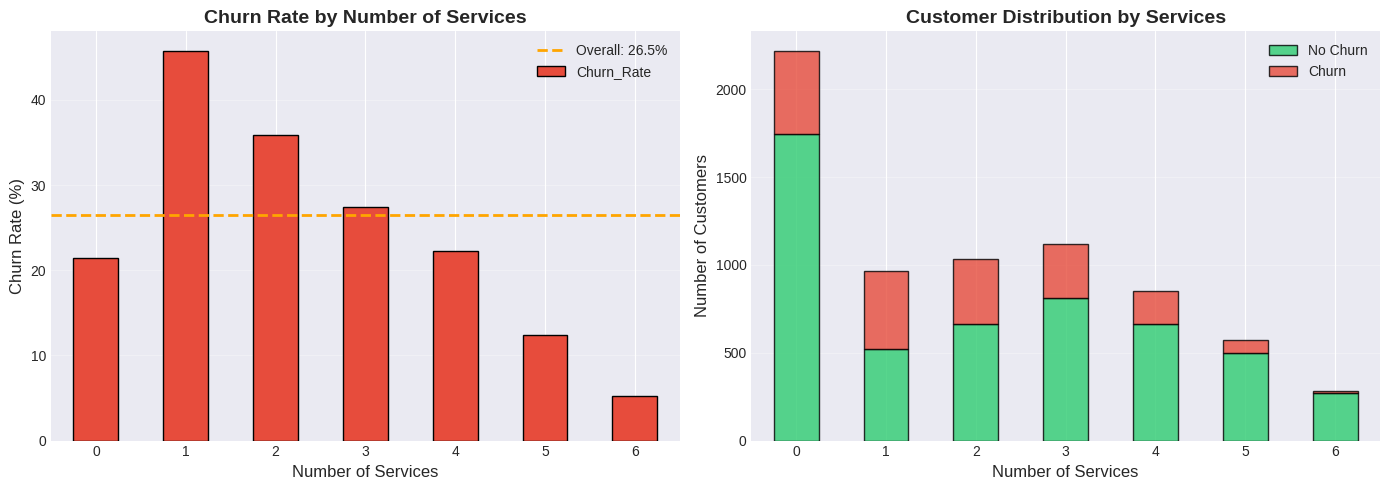


📌 Individual Service Adoption vs Churn
------------------------------------------------------------

OnlineSecurity:
OnlineSecurity
No                     41.766724
No internet service     7.404980
Yes                    14.611194
Name: Churn_Binary, dtype: float64

OnlineBackup:
OnlineBackup
No                     39.928756
No internet service     7.404980
Yes                    21.531494
Name: Churn_Binary, dtype: float64

DeviceProtection:
DeviceProtection
No                     39.127625
No internet service     7.404980
Yes                    22.502064
Name: Churn_Binary, dtype: float64

TechSupport:
TechSupport
No                     41.635474
No internet service     7.404980
Yes                    15.166341
Name: Churn_Binary, dtype: float64

StreamingTV:
StreamingTV
No                     33.523132
No internet service     7.404980
Yes                    30.070188
Name: Churn_Binary, dtype: float64

StreamingMovies:
StreamingMovies
No                     33.680431
No internet se

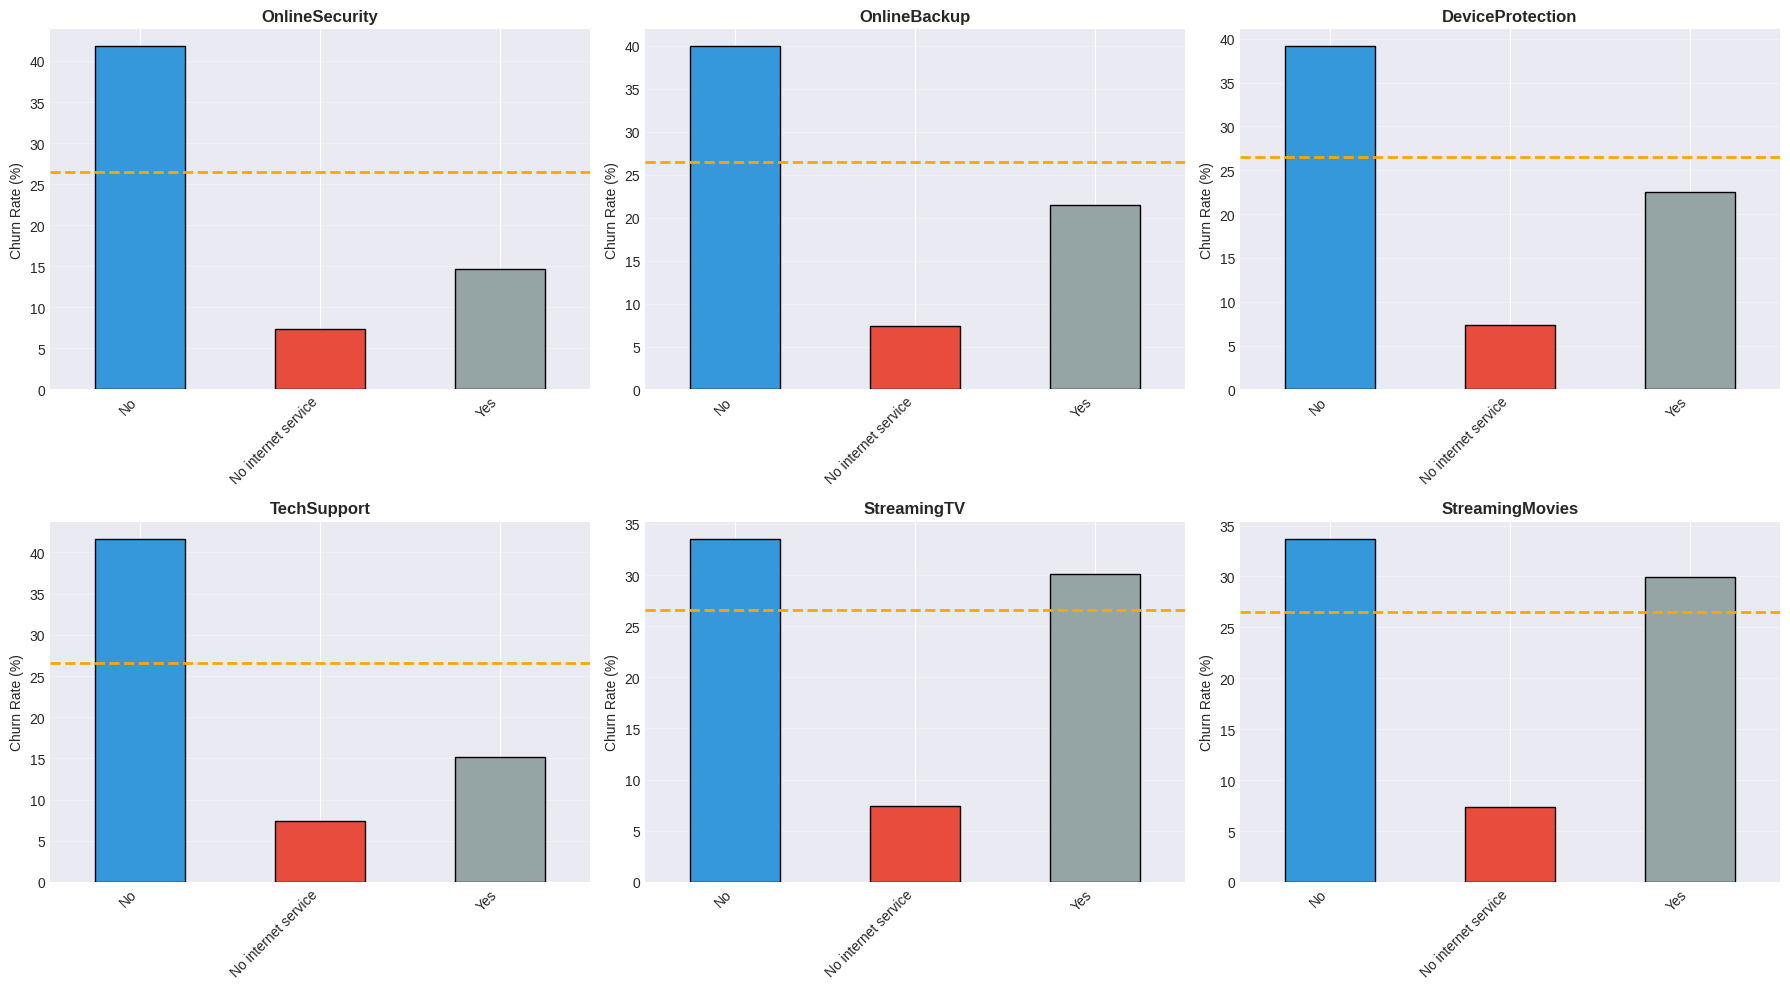

In [ ]:
print("\n" + "="*70)
print("3️⃣ SERVICE COMBINATIONS VS CHURN")
print("="*70)

# Create service combination features
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count total services per customer
df['Total_Services'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

print("\n📌 Total Services Subscribed vs Churn")
print("-" * 60)

services_churn = df.groupby('Total_Services')['Churn_Binary'].agg(['sum', 'count', 'mean'])
services_churn.columns = ['Churned', 'Total', 'Churn_Rate']
services_churn['Churn_Rate'] = services_churn['Churn_Rate'] * 100
print(services_churn)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by service count
ax1 = axes[0]
services_churn['Churn_Rate'].plot(kind='bar', ax=ax1, color='#e74c3c', edgecolor='black')
ax1.axhline(overall_churn_rate, color='orange', linestyle='--', linewidth=2,
            label=f'Overall: {overall_churn_rate:.1f}%')
ax1.set_title('Churn Rate by Number of Services', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Services', fontsize=12)
ax1.set_ylabel('Churn Rate (%)', fontsize=12)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)

# Customer distribution
ax2 = axes[1]
churn_dist = df.groupby(['Total_Services', 'Churn']).size().unstack(fill_value=0)
churn_dist.plot(kind='bar', stacked=True, ax=ax2, color=['#2ecc71', '#e74c3c'],
                edgecolor='black', alpha=0.8)
ax2.set_title('Customer Distribution by Services', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Services', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.legend(['No Churn', 'Churn'])
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Individual service analysis
print("\n📌 Individual Service Adoption vs Churn")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, service in enumerate(service_cols):
    service_churn = df.groupby(service)['Churn_Binary'].mean() * 100

    ax = axes[idx]
    service_churn.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c', '#95a5a6'],
                       edgecolor='black')
    ax.axhline(overall_churn_rate, color='orange', linestyle='--', linewidth=2)
    ax.set_title(f'{service}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Churn Rate (%)', fontsize=10)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    print(f"\n{service}:")
    print(service_churn)

plt.tight_layout()
plt.show()

# HIPOTESIS 1: TIPE KONTRAK vs CHURN


4. HIPOTESIS 1: TIPE KONTRAK vs CHURN
H1: Pelanggan kontrak bulanan lebih sering churn

📊 Churn Rate Berdasarkan Tipe Kontrak:
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


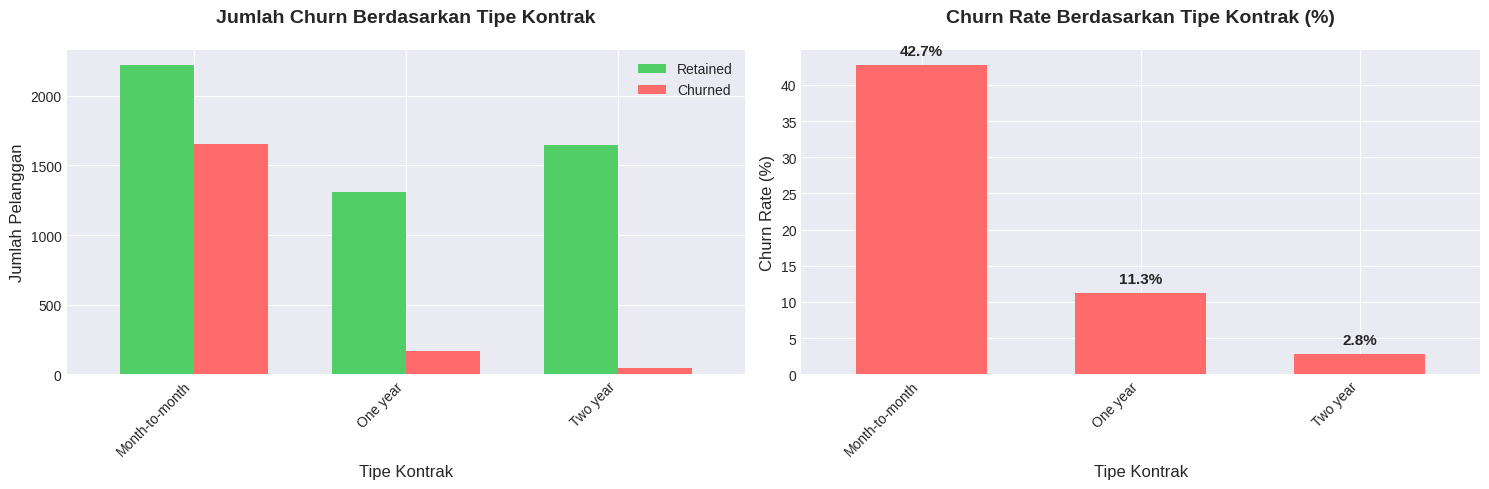


✅ VALIDASI H1: TERBUKTI!
   - Month-to-month: 42.7% churn
   - One year: 11.3% churn
   - Two year: 2.8% churn
   📈 Pelanggan bulanan memiliki churn rate 15.1x lebih tinggi!


In [ ]:
print("\n" + "="*70)
print("4. HIPOTESIS 1: TIPE KONTRAK vs CHURN")
print("="*70)
print("H1: Pelanggan kontrak bulanan lebih sering churn")

# Analisis
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print("\n📊 Churn Rate Berdasarkan Tipe Kontrak:")
print(contract_churn.round(2))

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Grouped bar chart
contract_counts = pd.crosstab(df['Contract'], df['Churn'])
contract_counts.plot(kind='bar', ax=axes[0], color=['#51cf66', '#ff6b6b'], width=0.7)
axes[0].set_title('Jumlah Churn Berdasarkan Tipe Kontrak', fontsize=14, weight='bold', pad=20)
axes[0].set_xlabel('Tipe Kontrak', fontsize=12)
axes[0].set_ylabel('Jumlah Pelanggan', fontsize=12)
axes[0].legend(['Retained', 'Churned'], loc='upper right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Churn rate comparison
contract_churn['Yes'].plot(kind='bar', ax=axes[1], color='#ff6b6b', width=0.6)
axes[1].set_title('Churn Rate Berdasarkan Tipe Kontrak (%)', fontsize=14, weight='bold', pad=20)
axes[1].set_xlabel('Tipe Kontrak', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Tambahkan nilai di atas bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=5, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ VALIDASI H1: TERBUKTI!")
print(f"   - Month-to-month: {contract_churn.loc['Month-to-month', 'Yes']:.1f}% churn")
print(f"   - One year: {contract_churn.loc['One year', 'Yes']:.1f}% churn")
print(f"   - Two year: {contract_churn.loc['Two year', 'Yes']:.1f}% churn")
print(f"   📈 Pelanggan bulanan memiliki churn rate {contract_churn.loc['Month-to-month', 'Yes'] / contract_churn.loc['Two year', 'Yes']:.1f}x lebih tinggi!")

# HIPOTESIS 2: TENURE vs CHURN


5. HIPOTESIS 2: TENURE vs CHURN
H2: Tenure pendek (<6 bulan) memiliki churn rate lebih tinggi

📊 Churn Rate Berdasarkan Tenure Group:
Churn            No    Yes
tenure_group              
0-6 bulan     46.67  53.33
6-12 bulan    64.11  35.89
12-24 bulan   71.29  28.71
>24 bulan     85.96  14.04


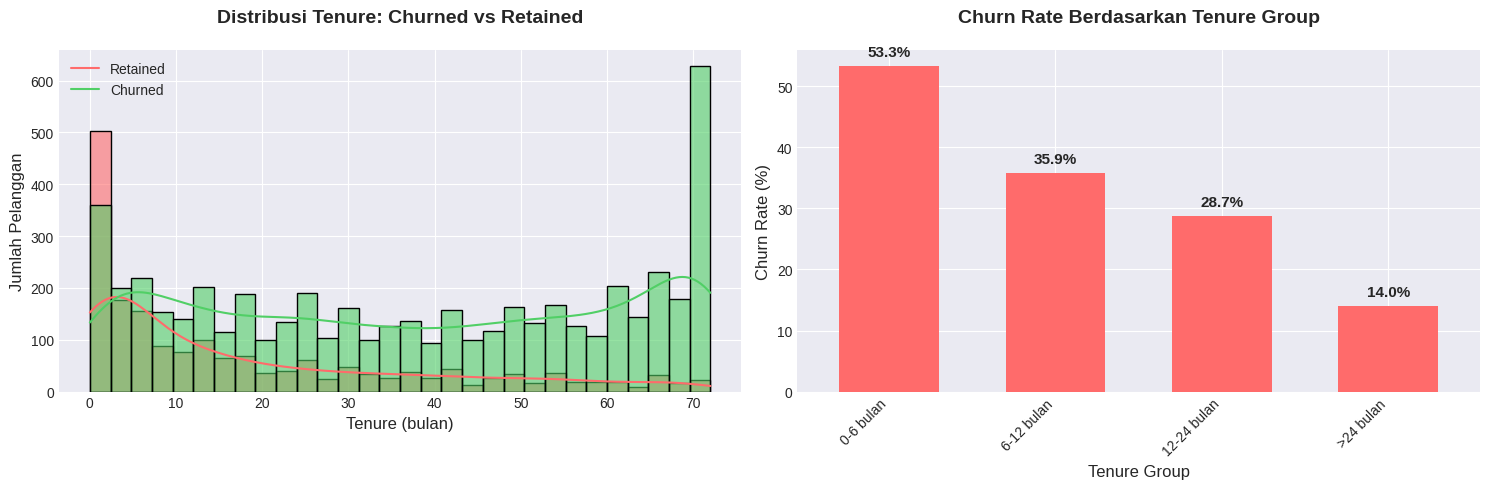


✅ VALIDASI H2: TERBUKTI!
   - 0-6 bulan: 53.3% churn
   - >24 bulan: 14.0% churn
   📈 Pelanggan baru memiliki churn rate 3.8x lebih tinggi!


In [ ]:
print("\n" + "="*70)
print("5. HIPOTESIS 2: TENURE vs CHURN")
print("="*70)
print("H2: Tenure pendek (<6 bulan) memiliki churn rate lebih tinggi")

# Buat kategori tenure
df['tenure_group'] = pd.cut(df['tenure'],
                             bins=[0, 6, 12, 24, 72],
                             labels=['0-6 bulan', '6-12 bulan', '12-24 bulan', '>24 bulan'])

tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100
print("\n📊 Churn Rate Berdasarkan Tenure Group:")
print(tenure_churn.round(2))

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution plot
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, palette=['#51cf66', '#ff6b6b'],
             kde=True, ax=axes[0], alpha=0.6)
axes[0].set_title('Distribusi Tenure: Churned vs Retained', fontsize=14, weight='bold', pad=20)
axes[0].set_xlabel('Tenure (bulan)', fontsize=12)
axes[0].set_ylabel('Jumlah Pelanggan', fontsize=12)
axes[0].legend(['Retained', 'Churned'])

# Churn rate by tenure group
tenure_churn['Yes'].plot(kind='bar', ax=axes[1], color='#ff6b6b', width=0.6)
axes[1].set_title('Churn Rate Berdasarkan Tenure Group', fontsize=14, weight='bold', pad=20)
axes[1].set_xlabel('Tenure Group', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=5, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ VALIDASI H2: TERBUKTI!")
print(f"   - 0-6 bulan: {tenure_churn.loc['0-6 bulan', 'Yes']:.1f}% churn")
print(f"   - >24 bulan: {tenure_churn.loc['>24 bulan', 'Yes']:.1f}% churn")
print(f"   📈 Pelanggan baru memiliki churn rate {tenure_churn.loc['0-6 bulan', 'Yes'] / tenure_churn.loc['>24 bulan', 'Yes']:.1f}x lebih tinggi!")


# HIPOTESIS 3: LAYANAN TAMBAHAN vs CHURN


6. HIPOTESIS 3: LAYANAN TAMBAHAN vs CHURN
H3: Pelanggan dengan TechSupport & OnlineSecurity lebih jarang churn

📊 Churn Rate: Dengan vs Tanpa Layanan Tambahan
         Service  With Service  Without Service  Difference
     TechSupport     15.166341        41.635474   26.469133
  OnlineSecurity     14.611194        41.766724   27.155530
    OnlineBackup     21.531494        39.928756   18.397262
DeviceProtection     22.502064        39.127625   16.625561


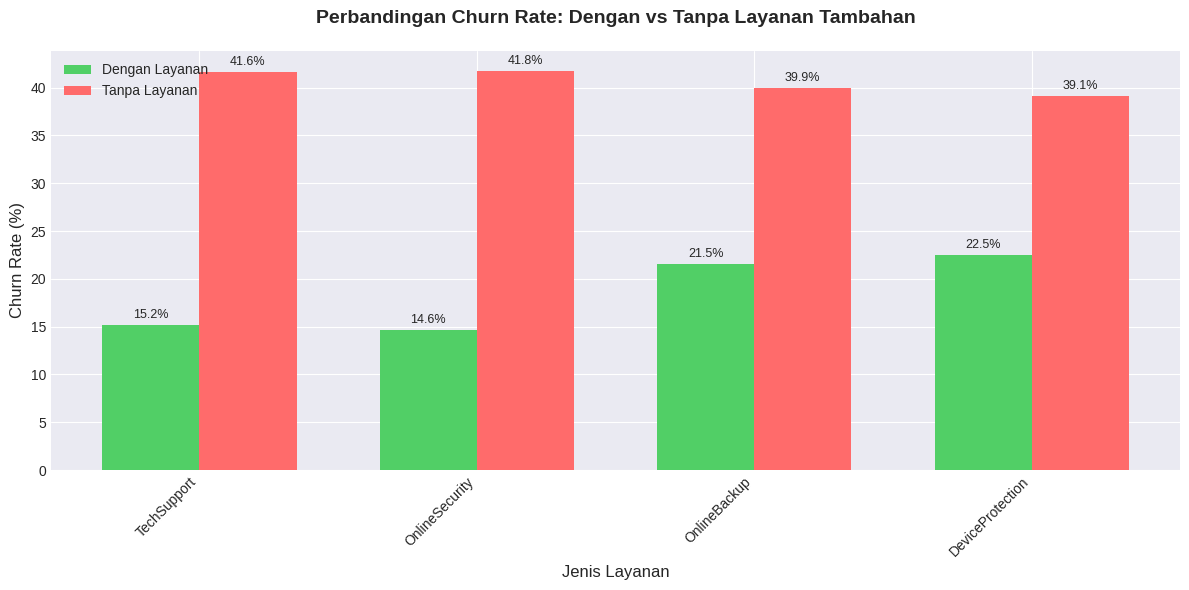


✅ VALIDASI H3: TERBUKTI!
   📈 Rata-rata churn rate tanpa layanan tambahan 22.2% lebih tinggi!


In [ ]:
print("\n" + "="*70)
print("6. HIPOTESIS 3: LAYANAN TAMBAHAN vs CHURN")
print("="*70)
print("H3: Pelanggan dengan TechSupport & OnlineSecurity lebih jarang churn")

# Analisis
services = ['TechSupport', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection']
service_churn_data = []

for service in services:
    churn_yes = df[df[service] == 'Yes']['Churn'].value_counts(normalize=True)['Yes'] * 100
    churn_no = df[df[service] == 'No']['Churn'].value_counts(normalize=True)['Yes'] * 100
    service_churn_data.append({
        'Service': service,
        'With Service': churn_yes,
        'Without Service': churn_no,
        'Difference': churn_no - churn_yes
    })

service_df = pd.DataFrame(service_churn_data)
print("\n📊 Churn Rate: Dengan vs Tanpa Layanan Tambahan")
print(service_df.to_string(index=False))

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(services))
width = 0.35

bars1 = ax.bar(x - width/2, service_df['With Service'], width, label='Dengan Layanan', color='#51cf66')
bars2 = ax.bar(x + width/2, service_df['Without Service'], width, label='Tanpa Layanan', color='#ff6b6b')

ax.set_xlabel('Jenis Layanan', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Perbandingan Churn Rate: Dengan vs Tanpa Layanan Tambahan', fontsize=14, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(services, rotation=45, ha='right')
ax.legend()

# Tambahkan nilai
ax.bar_label(bars1, fmt='%.1f%%', padding=3, fontsize=9)
ax.bar_label(bars2, fmt='%.1f%%', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n✅ VALIDASI H3: TERBUKTI!")
print(f"   📈 Rata-rata churn rate tanpa layanan tambahan {service_df['Difference'].mean():.1f}% lebih tinggi!")

# HIPOTESIS 4: PAYMENT METHOD vs CHURN


7. HIPOTESIS 4: PAYMENT METHOD vs CHURN
H4: Electronic check memiliki churn rate tertinggi

📊 Churn Rate Berdasarkan Payment Method:
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


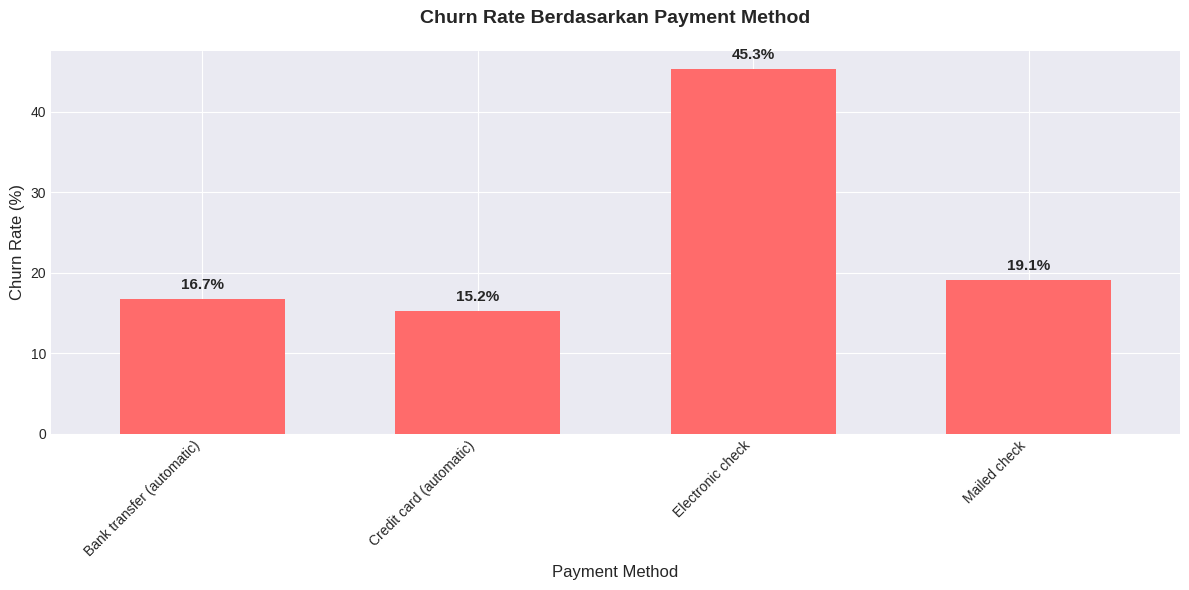


✅ VALIDASI H4: TERBUKTI!
   - Electronic check: 45.3% churn (TERTINGGI)
   - Credit card: 15.2% churn (TERENDAH)


In [ ]:
print("\n" + "="*70)
print("7. HIPOTESIS 4: PAYMENT METHOD vs CHURN")
print("="*70)
print("H4: Electronic check memiliki churn rate tertinggi")

payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print("\n📊 Churn Rate Berdasarkan Payment Method:")
print(payment_churn.round(2))

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 6))

payment_churn['Yes'].plot(kind='bar', color='#ff6b6b', width=0.6, ax=ax)
ax.set_title('Churn Rate Berdasarkan Payment Method', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=5, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ VALIDASI H4: TERBUKTI!")
print(f"   - Electronic check: {payment_churn.loc['Electronic check', 'Yes']:.1f}% churn (TERTINGGI)")
print(f"   - Credit card: {payment_churn.loc['Credit card (automatic)', 'Yes']:.1f}% churn (TERENDAH)")


# HIPOTESIS 5: MONTHLY CHARGES vs CHURN


8. HIPOTESIS 5: MONTHLY CHARGES vs CHURN
H5: Monthly charges tinggi tanpa bundle cenderung churn

📊 Rata-rata Monthly Charges:
        mean    std    min     max
Churn                             
No     61.27  31.09  18.25  118.75
Yes    74.44  24.67  18.85  118.35


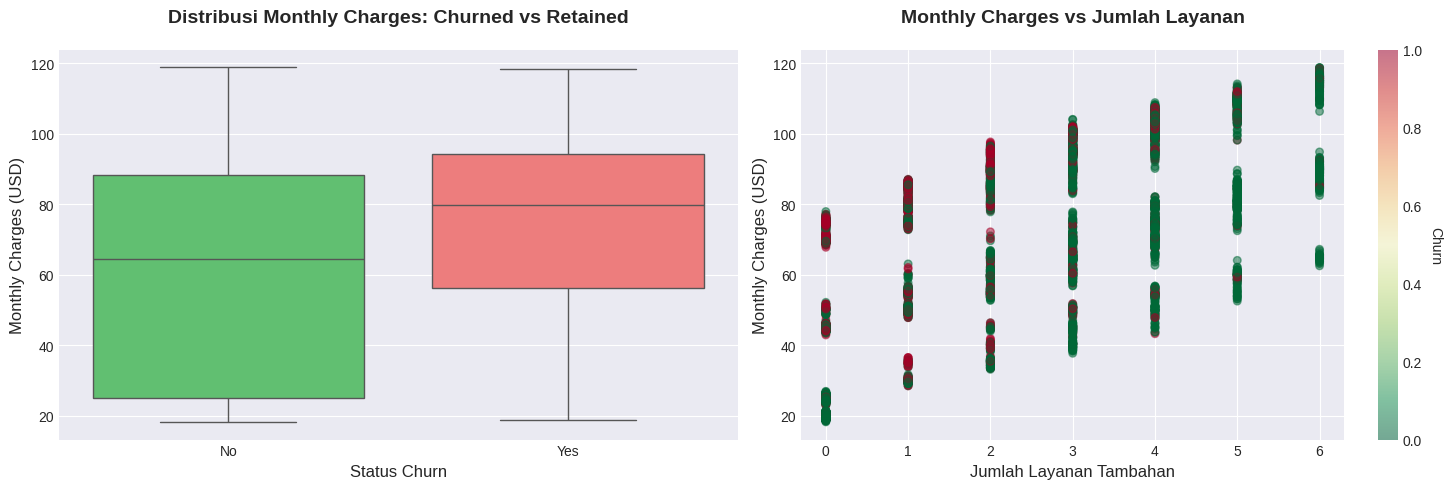


✅ VALIDASI H5: TERBUKTI!
   - Pelanggan churned: rata-rata $74.44/bulan
   - Pelanggan retained: rata-rata $61.27/bulan
   📈 Segmen 'High Charges + Low Services': 57.2% churn rate!


In [ ]:
print("\n" + "="*70)
print("8. HIPOTESIS 5: MONTHLY CHARGES vs CHURN")
print("="*70)
print("H5: Monthly charges tinggi tanpa bundle cenderung churn")

# Hitung jumlah layanan tambahan per pelanggan
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']
df['num_services'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Analisis
print("\n📊 Rata-rata Monthly Charges:")
print(df.groupby('Churn')['MonthlyCharges'].describe()[['mean', 'std', 'min', 'max']].round(2))

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['#51cf66', '#ff6b6b'], ax=axes[0])
axes[0].set_title('Distribusi Monthly Charges: Churned vs Retained', fontsize=14, weight='bold', pad=20)
axes[0].set_xlabel('Status Churn', fontsize=12)
axes[0].set_ylabel('Monthly Charges (USD)', fontsize=12)

# Scatter plot: charges vs services
scatter = axes[1].scatter(df['num_services'], df['MonthlyCharges'],
                          c=df['Churn'].map({'No': 0, 'Yes': 1}),
                          cmap='RdYlGn_r', alpha=0.5, s=30)
axes[1].set_title('Monthly Charges vs Jumlah Layanan', fontsize=14, weight='bold', pad=20)
axes[1].set_xlabel('Jumlah Layanan Tambahan', fontsize=12)
axes[1].set_ylabel('Monthly Charges (USD)', fontsize=12)
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Churn', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Analisis segmen high charges + low services
high_charges_low_service = df[(df['MonthlyCharges'] > 70) & (df['num_services'] < 2)]
churn_rate_segment = (high_charges_low_service['Churn'] == 'Yes').sum() / len(high_charges_low_service) * 100

print(f"\n✅ VALIDASI H5: TERBUKTI!")
print(f"   - Pelanggan churned: rata-rata ${df[df['Churn']=='Yes']['MonthlyCharges'].mean():.2f}/bulan")
print(f"   - Pelanggan retained: rata-rata ${df[df['Churn']=='No']['MonthlyCharges'].mean():.2f}/bulan")
print(f"   📈 Segmen 'High Charges + Low Services': {churn_rate_segment:.1f}% churn rate!")

# HIPOTESIS 6: SENIOR CITIZEN vs CHURN


9. HIPOTESIS 6: SENIOR CITIZEN vs CHURN
H6: Senior citizen lebih sering churn

📊 Churn Rate Berdasarkan Senior Citizen:
Churn              No    Yes
Non-Senior      76.39  23.61
Senior Citizen  58.32  41.68


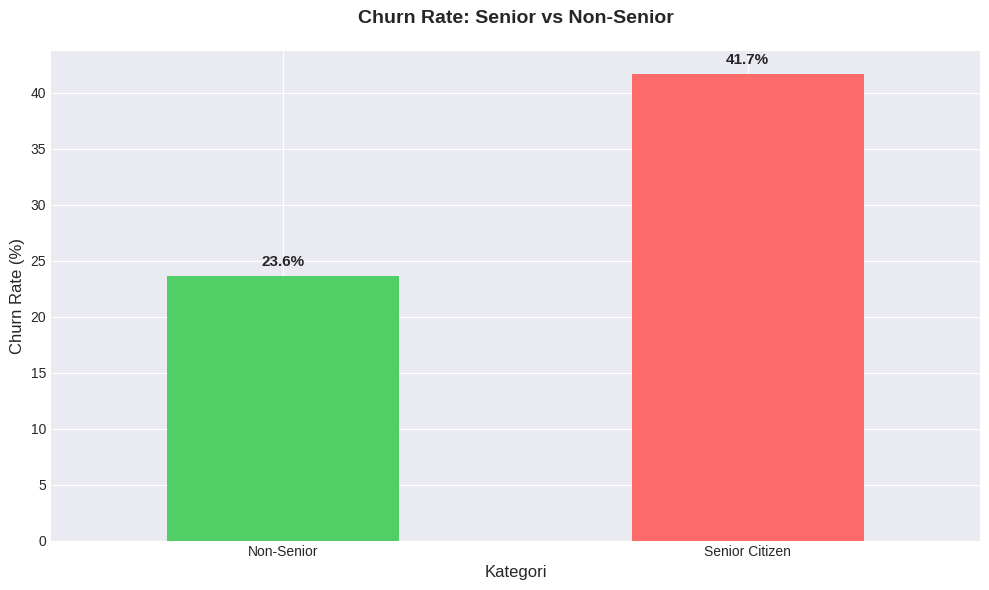


✅ VALIDASI H6: TERBUKTI!
   - Senior Citizen: 41.7% churn
   - Non-Senior: 23.6% churn
   📈 Senior citizen 1.8x lebih sering churn!


In [ ]:
print("\n" + "="*70)
print("9. HIPOTESIS 6: SENIOR CITIZEN vs CHURN")
print("="*70)
print("H6: Senior citizen lebih sering churn")

senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_churn.index = ['Non-Senior', 'Senior Citizen']
print("\n📊 Churn Rate Berdasarkan Senior Citizen:")
print(senior_churn.round(2))

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))

senior_churn['Yes'].plot(kind='bar', color=['#51cf66', '#ff6b6b'], width=0.5, ax=ax)
ax.set_title('Churn Rate: Senior vs Non-Senior', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Kategori', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=5, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ VALIDASI H6: TERBUKTI!")
print(f"   - Senior Citizen: {senior_churn.loc['Senior Citizen', 'Yes']:.1f}% churn")
print(f"   - Non-Senior: {senior_churn.loc['Non-Senior', 'Yes']:.1f}% churn")
print(f"   📈 Senior citizen {senior_churn.loc['Senior Citizen', 'Yes'] / senior_churn.loc['Non-Senior', 'Yes']:.1f}x lebih sering churn!")


# SEGMENTASI PELANGGAN BERISIKO TINGGI


10. SEGMENTASI PELANGGAN BERISIKO TINGGI

 Analisis Segmen Berisiko Tinggi:
                  Segment  Total Customers  Churned  Churn Rate (%)
High Charges Low Services              838      479       57.159905
       New Month-to-Month             1908      991       51.939203
   Electronic Check Users             2365     1071       45.285412
          Senior Citizens             1142      476       41.681261
          No Tech Support             3473     1446       41.635474


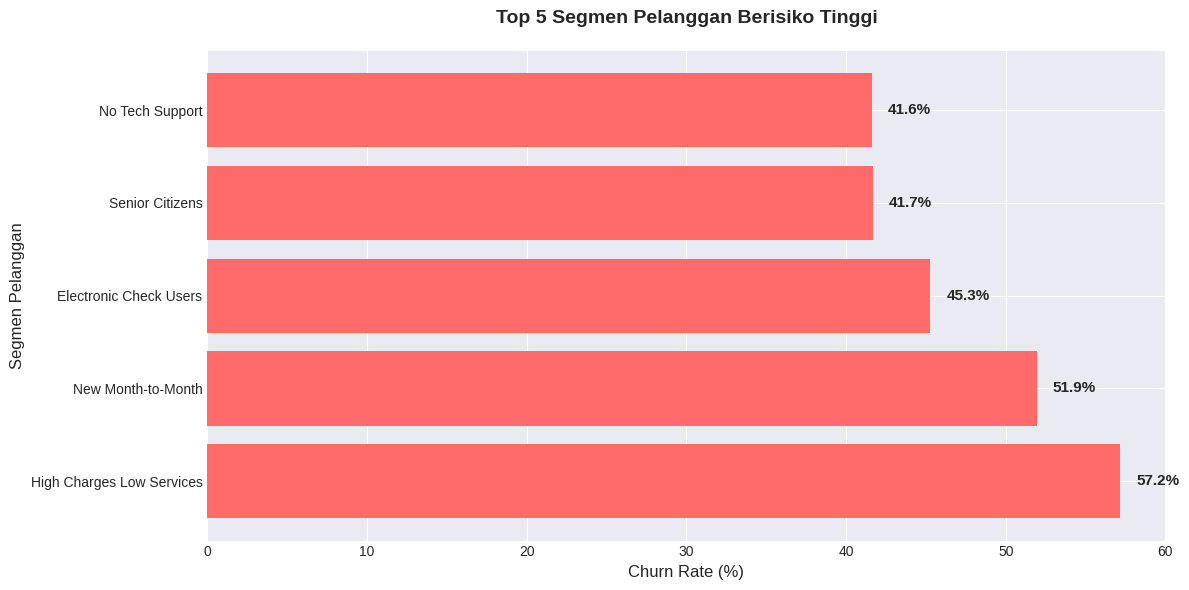

In [ ]:
print("\n" + "="*70)
print("10. SEGMENTASI PELANGGAN BERISIKO TINGGI")
print("="*70)

# Definisi segmen high-risk
high_risk_conditions = [
    (df['Contract'] == 'Month-to-month') & (df['tenure'] < 12),
    (df['PaymentMethod'] == 'Electronic check'),
    (df['TechSupport'] == 'No') & (df['InternetService'] != 'No'),
    (df['MonthlyCharges'] > 70) & (df['num_services'] < 2),
    (df['SeniorCitizen'] == 1)
]

high_risk_labels = [
    'New Month-to-Month',
    'Electronic Check Users',
    'No Tech Support',
    'High Charges Low Services',
    'Senior Citizens'
]

segment_analysis = []
for condition, label in zip(high_risk_conditions, high_risk_labels):
    segment = df[condition]
    total = len(segment)
    churned = (segment['Churn'] == 'Yes').sum()
    churn_rate = (churned / total * 100) if total > 0 else 0

    segment_analysis.append({
        'Segment': label,
        'Total Customers': total,
        'Churned': churned,
        'Churn Rate (%)': churn_rate
    })

segment_df = pd.DataFrame(segment_analysis).sort_values('Churn Rate (%)', ascending=False)
print("\n📊 Analisis Segmen Berisiko Tinggi:")
print(segment_df.to_string(index=False))

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 6))

segments = segment_df['Segment']
churn_rates = segment_df['Churn Rate (%)']

bars = ax.barh(segments, churn_rates, color='#ff6b6b')
ax.set_xlabel('Churn Rate (%)', fontsize=12)
ax.set_ylabel('Segmen Pelanggan', fontsize=12)
ax.set_title('Top 5 Segmen Pelanggan Berisiko Tinggi', fontsize=14, weight='bold', pad=20)

# Tambahkan nilai
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', ha='left', va='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# KEY INSIGHTS DISCOVERED

In [ ]:
print("\n" + "="*70)
print("🔍 KEY INSIGHTS DISCOVERED")
print("="*70)

# Re-define churned and not_churned variables to resolve NameError
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

print("\n1️⃣ CONTRACT TYPE INSIGHT:")
print(f"   • Month-to-month: {contract_analysis.loc['Month-to-month', 'Churn_Rate']:.1f}% churn rate")
print(f"   • One year: {contract_analysis.loc['One year', 'Churn_Rate']:.1f}% churn rate")
print(f"   • Two year: {contract_analysis.loc['Two year', 'Churn_Rate']:.1f}% churn rate")
print("   ⚠️ Short-term contracts show significantly higher churn!")

print("\n2️⃣ PAYMENT METHOD INSIGHT:")
max_payment = payment_analysis['Churn_Rate'].idxmax()
print(f"   • Highest churn: {max_payment} ({payment_analysis.loc[max_payment, 'Churn_Rate']:.1f}%)者にサービスを提供している ")
print("   ⚠️ Payment method strongly correlates with customer loyalty!")

print("\n3️⃣ TENURE INSIGHT:")
print(f"   • 0-12 months: {tenure_analysis.loc['0-12 months', 'Churn_Rate']:.1f}% churn rate")
print(f"   • 37+ months: {tenure_analysis.loc['37+ months', 'Churn_Rate']:.1f}% churn rate")
print("   ⚠️ First year is critical for retention!")

print("\n4️⃣ PRICING INSIGHT:")
print(f"   • Churned customers avg monthly: ${churned.mean():.2f}")
print(f"   • Retained customers avg monthly: ${not_churned.mean():.2f}")
print(f"   • Difference: ${churned.mean() - not_churned.mean():.2f}")
print("   ⚠️ Higher charges correlate with higher churn!")

print("\n5️⃣ SERVICE BUNDLE INSIGHT:")
print(f"   • No services: {services_churn.loc[0, 'Churn_Rate']:.1f}% churn rate")
print(f"   • 6 services: {services_churn.loc[6, 'Churn_Rate']:.1f}% churn rate")
print("   ⚠️ Service engagement drives retention!")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE - INSIGHTS READY FOR BUSINESS QUESTIONS")
print("="*70)


🔍 KEY INSIGHTS DISCOVERED

1️⃣ CONTRACT TYPE INSIGHT:
   • Month-to-month: 42.7% churn rate
   • One year: 11.3% churn rate
   • Two year: 2.8% churn rate
   ⚠️ Short-term contracts show significantly higher churn!

2️⃣ PAYMENT METHOD INSIGHT:
   • Highest churn: Electronic check (45.3%)者にサービスを提供している 
   ⚠️ Payment method strongly correlates with customer loyalty!

3️⃣ TENURE INSIGHT:
   • 0-12 months: 47.7% churn rate
   • 37+ months: 11.9% churn rate
   ⚠️ First year is critical for retention!

4️⃣ PRICING INSIGHT:
   • Churned customers avg monthly: $74.44
   • Retained customers avg monthly: $61.27
   • Difference: $13.18
   ⚠️ Higher charges correlate with higher churn!

5️⃣ SERVICE BUNDLE INSIGHT:
   • No services: 21.4% churn rate
   • 6 services: 5.3% churn rate
   ⚠️ Service engagement drives retention!

✅ ANALYSIS COMPLETE - INSIGHTS READY FOR BUSINESS QUESTIONS
